### Use of Deep Learning Learning and socio-behavioural characteristics to predict the HIV Status for Adults
Under this project the male and female data  was split from the datasets since some of the predictors were not the same for male and female data for the adult data

### Data Source:
I used the Population-based HIV Impact Assessment (PHIA) data that consists of cross-sectional household-based surveys designed to assess HIV-related key health indicators. ICAP, based in Columbia University in collaboration with the US Centers for Disease Control and Prevention (CDC) and the ministries of Health.

In [1]:
#Loading the dataset
import os
import pandas as pd
import pathlib
import glob
import pickle
import re
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", message=".*Do not pass an `input_shape`.*")
# set working directory
working_directory = r'C:\Users\user\OneDrive\Desktop\datasets ds\data sets\kenphia\PROJECT\adult'
os.chdir(working_directory)

# load data
ke = pickle.load(open("data/processed/Transformed_data/data_preprocessed.pkl", 'rb'))
pd.set_option("display.max.columns", None)

ke = pd.DataFrame(ke) 
ke.apply(pd.to_numeric, errors='ignore')
# set random seedb
random_seed = 5
max_nan_percent = 0.3
print(ke.shape)
ke.head(10)

(31032, 2133)


country     householdid          personid centroidid_x  county  indstatus  \
0      ke  KE000000004342  KE00000000434203     KE000684    35.0        1.0   
1      ke  KE000000017502  KE00000001750202     KE000707    30.0        1.0   
2      ke  KE000000004030  KE00000000403001     KE000006    18.0        1.0   
3      ke  KE000000018429  KE00000001842901     KE000432    34.0        1.0   
4      ke  KE000000009889  KE00000000988902     KE000088     2.0        1.0   
5      ke  KE000000012341  KE00000001234101     KE000175    30.0        1.0   
6      ke  KE000000015407  KE00000001540701     KE000368    42.0        1.0   
7      ke  KE000000010473  KE00000001047302     KE000657    11.0        1.0   
8      ke  KE000000005892  KE00000000589204     KE000574    16.0        1.0   
9      ke  KE000000003707  KE00000000370703     KE000554    17.0        1.0   

   gender_x  age_x  relattohh  livehere  sleephere  emancipated  momalive  \
0       1.0   25.0        3.0       1.0        1.0          NaN       NaN   
1       2.0   41.0        2.0       1.0        1.0          NaN       NaN   
2       2.0   42.0        1.0       1.0        1.0          NaN       NaN   
3       1.0   35.0        1.0       1.0        1.0          NaN       NaN   
4       2.0   48.0        2.0       1.0        1.0          NaN       NaN   
5       1.0   28.0        1.0       1.0        1.0          NaN       NaN   
6       2.0   39.0        1.0       1.0        1.0          NaN       NaN   
7       2.0   25.0        2.0       1.0        1.0          NaN       NaN   
8       1.0   16.0        3.0       1.0        1.0          2.0       1.0   
9       1.0   18.0        8.0       1.0        1.0          NaN       NaN   

   momhhm  femguardhhm  momfemname  dadalive  dadhhm  maleguardhhm  \
0     NaN          NaN         NaN       NaN     NaN           NaN   
1     NaN          NaN         NaN       NaN     NaN           NaN   
2     NaN          NaN         NaN       NaN     NaN           NaN   
3     NaN          NaN         NaN       NaN     NaN           NaN   
4     NaN          NaN         NaN       NaN     NaN           NaN   
5     NaN          NaN         NaN       NaN     NaN           NaN   
6     NaN          NaN         NaN       NaN     NaN           NaN   
7     NaN          NaN         NaN       NaN     NaN           NaN   
8     2.0          2.0         NaN       1.0     1.0           NaN   
9     NaN          NaN         NaN       NaN     NaN           NaN   

   dadmalename  sick3mo  momsick  dadsick  supportmed12  supportemot12  \
0          NaN      2.0      NaN      NaN           NaN            NaN   
1          NaN      2.0      NaN      NaN           NaN            NaN   
2          NaN      2.0      NaN      NaN           NaN            NaN   
3          NaN      2.0      NaN      NaN           NaN            NaN   
4          NaN      2.0      NaN      NaN           NaN            NaN   
5          NaN      2.0      NaN      NaN           NaN            NaN   
6          NaN      2.0      NaN      NaN           NaN            NaN   
7          NaN      2.0      NaN      NaN           NaN            NaN   
8          1.0      NaN      2.0      2.0           NaN            NaN   
9          NaN      1.0      NaN      NaN           NaN            NaN   

   supportemot3  supportmater12  supportmater3  supportsocial12  \
0           NaN             NaN            NaN              NaN   
1           NaN             NaN            NaN              NaN   
2           NaN             NaN            NaN              NaN   
3           NaN             NaN            NaN              NaN   
4           NaN             NaN            NaN              NaN   
5           NaN             NaN            NaN              NaN   
6           NaN             NaN            NaN              NaN   
7           NaN             NaN            NaN              NaN   
8           NaN             NaN            NaN              NaN   
9           NaN             

In [2]:
ke.shape

(31032, 2133)

### Feature Engineering

In [3]:
#drop columns from btwt0 to hepbsyphwt381
ke.drop(ke.iloc[:,1365:2133], inplace = True, axis = 1)

In [4]:
ke.head(0)

,country,householdid,personid,centroidid_x,county,indstatus,gender_x,age_x,relattohh,livehere,sleephere,emancipated,momalive,momhhm,femguardhhm,momfemname,dadalive,dadhhm,maleguardhhm,dadmalename,sick3mo,momsick,dadsick,supportmed12,supportemot12,supportemot3,supportmater12,supportmater3,supportsocial12,supportschol12,lngvint,lngvnat,trnsluse,nationality,sixmnout,whyaway,ethnic,religion,schlat,schlcur,adltcurgrd,adltmisch,admisreas,schlhi,adlstregs,adnosreas,work12mo,work7day,evermar,widow,curmar,numwif,numwifdk,reviewwife,npyn,npnum,wifliveew,wifliveewdk,huslivew,husotwif,husnwif,husnwifdk,pregnum,pregnumdk,liveb,childa2012,childa2012dk,prgtwin,prgcare,prgnmvsts,prgnmvstsdkrf,pregncr,hivtsbp,hivpsbp,hivtopg,hivtprg,hivtsnr,hivtstout,hivtswr_a,hivtswr_b,hivtswr_c,hivtswr_d,hivtswr_e,hivtswr_f,hivtswr_g,hivtswr_h,hivtswr_x,hivtswr_y,hivtsnum,hivtsnumdk,hivrtpg,brthwhr,hivtobr,hivttlb,carepsntl,hivtspntl,hivpsntlnm,hivpsntlnmdkrf,birthyr1,childlive1,childlivewith1,hhlnchild1,childbrstfd1,childfeed1,childaltfood_a1,childaltfood_b1,childaltfood_c1,childaltfood_d1,childaltfood_x1,childaltfood_y1,childaltfood_z1,pregnant,avoidpreg,cmethod_a,cmethod_c,cmethod_d,cmethod_e,cmethod_f,cmethod_g,cmethod_i,cmethod_j,cmethod_k,cmethod_x,cmethod_y,mcstatus,mcplans,mcage,mcagedk,mcwho,firstsxage,firstsxagedk,vgnsx12mo,vgnsxcon,analsxhrd,analsxever,analsx12mo,analsxcon,lifetimesex,lifetimesexdk,part12monum,part12modkr,partlivew1,partrelation1,partgend1,partage1,partagedk1,partlastcndm1,partlastsup1,partlastsupwhat_a1,partlastsupwhat_b1,partlastsupwhat_c1,partlastsupwhat_f1,partlastsupwhat_x1,partlastsupwhat_y1,partlastsupwhat_z1,partlastetoh1,partagain1,parthivtest1,parthivnotrsn1,partknowhiv1,parthivsat1,partlivew2,partrelation2,partgend2,partage2,partagedk2,partlastcndm2,partlastsup2,partlastsupwhat_a2,partlastsupwhat_b2,partlastsupwhat_c2,partlastsupwhat_f2,partlastsupwhat_x2,partlastsupwhat_y2,partlastsupwhat_z2,partlastetoh2,partagain2,parthivtest2,parthivnotrsn2,partknowhiv2,parthivsat2,partlivew3,partrelation3,partgend3,partage3,partagedk3,partlastcndm3,partlastsup3,partlastsupwhat_a3,partlastsupwhat_b3,partlastsupwhat_c3,partlastsupwhat_f3,partlastsupwhat_x3,partlastsupwhat_z3,partlastetoh3,partagain3,parthivtest3,parthivnotrsn3,partknowhiv3,parthivsat3,adltsxbfmar,adltfrhvsx,adltprfsxpart,adltnosx,onepartnr,mosquito,condoms,sharefood,healthyinf,buyfood,kidsschool,adlthrdhiv,adthrhiv_a,adthrhiv_b,adthrhiv_c,adthrhiv_d,adthrhiv_e,adthrhiv_f,adthrhiv_g,adthrhiv_h,adthrhiv_i,adthrhiv_j,adthrhiv_x,adthrhiv_y,adthrhiv_z,adhivprv_a,adhivprv_b,adhivprv_c,adhivprv_d,adhivprv_e,adhivprv_f,adhivprv_g,adhivprv_h,adhivprv_j,adhivprv_k,adhivprv_m,adhivprv_n,adhivprv_o,adhivprv_x,adhivprv_y,adhivprv_z,wahivprv_a,wahivprv_b,wahivprv_c,wahivprv_d,wahivprv_e,wahivprv_h,wahivprv_x,wahivprv_y,adltishiv,hivtstever,hivtstnors_a,hivtstnors_b,hivtstnors_c,hivtstnors_d,hivtstnors_e,hivtstnors_f,hivtstnors_g,hivtstnors_h,hivtstnors_i,hivtstnors_j,hivtstnors_k,hivtstnors_l,hivtstnors_x,hivtstnors_y,hivtstnors_z,hflast12mo,hfhivtstoffer,hivselftst,hivselftstrslt,hivtestm,hivtesty,hivtstlocation,hivtspbpvt,hivtststcfy,hivtstnscfy_a,hivtstnscfy_b,hivtstnscfy_c,hivtstnscfy_d,hivtstnscfy_e,hivtstnscfy_x,hivtstnscfy_y,hivtstnscfy_z,hivtstrslt,hivcarelink,hivtstfutloc,hivpercatrisk,hivtfposm,hivtfposy,hivpostell_a,hivpostell_b,hivpostell_c,hivpostell_d,hivpostell_e,hivpostell_x,hivpostell_y,hivwnottold_b,hivwnottold_x,hivwnottold_y,hivwnottold_z,hivstathrs_a,hivstathrs_b,hivstathrs_c,hivstathrs_d,hivstathrs_h,hivstathrs_y,hivstathrs_z,hivstathide,prpevrhdr,prepcurnt,prepwhr,pepevrhdr,pepevr,pepcurnt,atdshrm,atdsarv,hivcare,hivcfm,hivcfy,hivclm,hivcnot6mo,cd4testever,cd4ttm,cd4tty,arvstakenev,arvftm,arvfty,arvscurrent,arvsmissdays,arvsmissdaysdk,vltest,vltltm,vltlty,vltresult,nextappt,sptgrgo,sptgrfreq,sptgrfreqdk,sptgrrec_a,sptgrrec_b,sptgrrec_c,sptgrrec_d,sptgrrec_e,sptgrrec_f,sptgrrec_g,sptgrrec_x,sptgrrec_z,tbsympas_a,tbsympas_b,tbsympas_c,tbsympas_d,tbsympas_e,tbs

In [5]:
# drop cloumns from intwt0 to vmpstw381
ke.drop(ke.iloc[:,553:1323], inplace = True, axis = 1)

In [6]:
ke.head(3)

,country,householdid,personid,centroidid_x,county,indstatus,gender_x,age_x,relattohh,livehere,sleephere,emancipated,momalive,momhhm,femguardhhm,momfemname,dadalive,dadhhm,maleguardhhm,dadmalename,sick3mo,momsick,dadsick,supportmed12,supportemot12,supportemot3,supportmater12,supportmater3,supportsocial12,supportschol12,lngvint,lngvnat,trnsluse,nationality,sixmnout,whyaway,ethnic,religion,schlat,schlcur,adltcurgrd,adltmisch,admisreas,schlhi,adlstregs,adnosreas,work12mo,work7day,evermar,widow,curmar,numwif,numwifdk,reviewwife,npyn,npnum,wifliveew,wifliveewdk,huslivew,husotwif,husnwif,husnwifdk,pregnum,pregnumdk,liveb,childa2012,childa2012dk,prgtwin,prgcare,prgnmvsts,prgnmvstsdkrf,pregncr,hivtsbp,hivpsbp,hivtopg,hivtprg,hivtsnr,hivtstout,hivtswr_a,hivtswr_b,hivtswr_c,hivtswr_d,hivtswr_e,hivtswr_f,hivtswr_g,hivtswr_h,hivtswr_x,hivtswr_y,hivtsnum,hivtsnumdk,hivrtpg,brthwhr,hivtobr,hivttlb,carepsntl,hivtspntl,hivpsntlnm,hivpsntlnmdkrf,birthyr1,childlive1,childlivewith1,hhlnchild1,childbrstfd1,childfeed1,childaltfood_a1,childaltfood_b1,childaltfood_c1,childaltfood_d1,childaltfood_x1,childaltfood_y1,childaltfood_z1,pregnant,avoidpreg,cmethod_a,cmethod_c,cmethod_d,cmethod_e,cmethod_f,cmethod_g,cmethod_i,cmethod_j,cmethod_k,cmethod_x,cmethod_y,mcstatus,mcplans,mcage,mcagedk,mcwho,firstsxage,firstsxagedk,vgnsx12mo,vgnsxcon,analsxhrd,analsxever,analsx12mo,analsxcon,lifetimesex,lifetimesexdk,part12monum,part12modkr,partlivew1,partrelation1,partgend1,partage1,partagedk1,partlastcndm1,partlastsup1,partlastsupwhat_a1,partlastsupwhat_b1,partlastsupwhat_c1,partlastsupwhat_f1,partlastsupwhat_x1,partlastsupwhat_y1,partlastsupwhat_z1,partlastetoh1,partagain1,parthivtest1,parthivnotrsn1,partknowhiv1,parthivsat1,partlivew2,partrelation2,partgend2,partage2,partagedk2,partlastcndm2,partlastsup2,partlastsupwhat_a2,partlastsupwhat_b2,partlastsupwhat_c2,partlastsupwhat_f2,partlastsupwhat_x2,partlastsupwhat_y2,partlastsupwhat_z2,partlastetoh2,partagain2,parthivtest2,parthivnotrsn2,partknowhiv2,parthivsat2,partlivew3,partrelation3,partgend3,partage3,partagedk3,partlastcndm3,partlastsup3,partlastsupwhat_a3,partlastsupwhat_b3,partlastsupwhat_c3,partlastsupwhat_f3,partlastsupwhat_x3,partlastsupwhat_z3,partlastetoh3,partagain3,parthivtest3,parthivnotrsn3,partknowhiv3,parthivsat3,adltsxbfmar,adltfrhvsx,adltprfsxpart,adltnosx,onepartnr,mosquito,condoms,sharefood,healthyinf,buyfood,kidsschool,adlthrdhiv,adthrhiv_a,adthrhiv_b,adthrhiv_c,adthrhiv_d,adthrhiv_e,adthrhiv_f,adthrhiv_g,adthrhiv_h,adthrhiv_i,adthrhiv_j,adthrhiv_x,adthrhiv_y,adthrhiv_z,adhivprv_a,adhivprv_b,adhivprv_c,adhivprv_d,adhivprv_e,adhivprv_f,adhivprv_g,adhivprv_h,adhivprv_j,adhivprv_k,adhivprv_m,adhivprv_n,adhivprv_o,adhivprv_x,adhivprv_y,adhivprv_z,wahivprv_a,wahivprv_b,wahivprv_c,wahivprv_d,wahivprv_e,wahivprv_h,wahivprv_x,wahivprv_y,adltishiv,hivtstever,hivtstnors_a,hivtstnors_b,hivtstnors_c,hivtstnors_d,hivtstnors_e,hivtstnors_f,hivtstnors_g,hivtstnors_h,hivtstnors_i,hivtstnors_j,hivtstnors_k,hivtstnors_l,hivtstnors_x,hivtstnors_y,hivtstnors_z,hflast12mo,hfhivtstoffer,hivselftst,hivselftstrslt,hivtestm,hivtesty,hivtstlocation,hivtspbpvt,hivtststcfy,hivtstnscfy_a,hivtstnscfy_b,hivtstnscfy_c,hivtstnscfy_d,hivtstnscfy_e,hivtstnscfy_x,hivtstnscfy_y,hivtstnscfy_z,hivtstrslt,hivcarelink,hivtstfutloc,hivpercatrisk,hivtfposm,hivtfposy,hivpostell_a,hivpostell_b,hivpostell_c,hivpostell_d,hivpostell_e,hivpostell_x,hivpostell_y,hivwnottold_b,hivwnottold_x,hivwnottold_y,hivwnottold_z,hivstathrs_a,hivstathrs_b,hivstathrs_c,hivstathrs_d,hivstathrs_h,hivstathrs_y,hivstathrs_z,hivstathide,prpevrhdr,prepcurnt,prepwhr,pepevrhdr,pepevr,pepcurnt,atdshrm,atdsarv,hivcare,hivcfm,hivcfy,hivclm,hivcnot6mo,cd4testever,cd4ttm,cd4tty,arvstakenev,arvftm,arvfty,arvscurrent,arvsmissdays,arvsmissdaysdk,vltest,vltltm,vltlty,vltresult,nextappt,sptgrgo,sptgrfreq,sptgrfreqdk,sptgrrec_a,sptgrrec_b,sptgrrec_c,sptgrrec_d,sptgrrec_e,sptgrrec_f,sptgrrec_g,sptgrrec_x,sptgrrec_z,tbsympas_a,tbsympas_b,tbsympas_c,tbsympas_d,tbsympas_e,tbs

In [7]:
ke.drop(["country","householdid","personid","centroidid_x","indstatus","hivtswr_a","hivtswr_b","hivtswr_c","hivtswr_d","hivtswr_e","hivtswr_f","hivtswr_g","hivtswr_h","hivtswr_x","hivtswr_y","childaltfood_a1","childaltfood_b1","childaltfood_c1","childaltfood_d1","childaltfood_x1","childaltfood_y1","childaltfood_z1","cmethod_a","cmethod_c","cmethod_d","cmethod_e","cmethod_f","cmethod_g","cmethod_i","cmethod_j","cmethod_k","cmethod_x","cmethod_y","partlastsupwhat_a1","partlastsupwhat_b1","partlastsupwhat_c1","partlastsupwhat_f1","partlastsupwhat_x1","partlastsupwhat_y1","partlastsupwhat_z1","partlastsupwhat_a2","partlastsupwhat_b2","partlastsupwhat_c2","partlastsupwhat_f2","partlastsupwhat_x2","partlastsupwhat_y2","partlastsupwhat_z2","partlastsupwhat_a3","partlastsupwhat_b3","partlastsupwhat_c3","partlastsupwhat_f3","partlastsupwhat_x3","partlastsupwhat_z3","adthrhiv_a","adthrhiv_b","adthrhiv_c","adthrhiv_d","adthrhiv_e","adthrhiv_f","adthrhiv_g","adthrhiv_h","adthrhiv_i","adthrhiv_j","adthrhiv_x","adthrhiv_y","adthrhiv_z","adhivprv_a","adhivprv_b","adhivprv_c","adhivprv_d","adhivprv_e","adhivprv_f","adhivprv_g","adhivprv_h","adhivprv_j","adhivprv_k","adhivprv_m","adhivprv_n","adhivprv_o","adhivprv_x","adhivprv_y","adhivprv_z","wahivprv_a","wahivprv_b","wahivprv_c","wahivprv_d","wahivprv_e","wahivprv_h","wahivprv_x","wahivprv_y","hivtstnors_a","hivtstnors_b","hivtstnors_c","hivtstnors_d","hivtstnors_e","hivtstnors_f","hivtstnors_g","hivtstnors_h","hivtstnors_i","hivtstnors_j","hivtstnors_k","hivtstnors_l","hivtstnors_x","hivtstnors_y","hivtstnors_z","hivtstnscfy_a","hivtstnscfy_b","hivtstnscfy_c","hivtstnscfy_d","hivtstnscfy_e","hivtstnscfy_x","hivtstnscfy_y","hivtstnscfy_z","hivpostell_a","hivpostell_b","hivpostell_c","hivpostell_d","hivpostell_e","hivpostell_x","hivpostell_y","hivwnottold_b","hivwnottold_x","hivwnottold_y","hivwnottold_z","hivstathrs_a","hivstathrs_b","hivstathrs_c","hivstathrs_d","hivstathrs_h","hivstathrs_y","hivstathrs_z","sptgrrec_a","sptgrrec_b","sptgrrec_c","sptgrrec_d","sptgrrec_e","sptgrrec_f","sptgrrec_g","sptgrrec_x","sptgrrec_z","tbsympas_a","tbsympas_b","tbsympas_c","tbsympas_d","tbsympas_e","tbsympas_y","tbsympas_z","stdnotrt_a","stdnotrt_b","stdnotrt_c","stdnotrt_d","stdnotrt_x","stdnotrt_y","stdnotrt_z","stdtrtpresc_a","stdtrtpresc_b","stdtrtpresc_x","adltaclwhr_a","adltaclwhr_b","adltaclwhr_c","adltaclwhr_x","adltaclwho_a","adltaclwho_b","adltaclwho_x","adltaclwho_z","recdrugevr_a","recdrugevr_b","recdrugevr_d","recdrugevr_x","recdrugevr_y","recdrugevr_z","adltdrugwh_a","adltdrugwh_b","adltdrugwh_x","adltdrugwh_z","adltdrugwo_a","adltdrugwo_x","adltdrugwo_y","adltdrugwo_z","injadmin_a","injadmin_b","injadmin_c","injadmin_y","unwnsxnohp_a","unwnsxnohp_b","unwnsxnohp_c","unwnsxnohp_d","unwnsxnohp_e","unwnsxnohp_x","unwnsxnohp_y","unwnsxnohp_z","husid","partid1","partid2","partid3","partnerclusterid","momid","centroidid_y","bt_status_y","syph1invalid","syph2invalid","declinerresultsyph","linenumfixed", "surveystmonth", "nationality", "surveystyear","declinerresulthepb","resultvlc","hivstathrs_x"],axis=1, inplace=True)           
print(ke.shape)

(31032, 386)


In [8]:
# drop duplicate columns
ke_duplicate = ke.T.drop_duplicates(keep='first').T

In [9]:
print(ke_duplicate.shape)

(31032, 337)


In [10]:
#rename the dataframe
ke = ke_duplicate

In [11]:
# drop constant columns
ke_unique = ke.loc[:, ke.nunique()!=1]
ke = ke_unique.T.drop_duplicates(keep='first').T
ke.shape

(31032, 326)

In [12]:
kee=ke
kee.hivstatusfinal_x[kee.hivstatusfinal_x == 1] = 1
kee.hivstatusfinal_x[kee.hivstatusfinal_x == 2] = 0
kee.rename(columns={'hivstatusfinal_x': 'hivstatusfinal'}, inplace=True)

kee.rename(columns={'condomlastsex12months': 'Condom was used at last sexual encounter in the past 12 months'}, inplace=True)

In [13]:
keee=kee
keee.rename(columns={'urban_x': 'Urban area indicator'}, inplace=True)#label2
keee.rename(columns={'wealthquintile_x': 'Wealth quintile'}, inplace=True)#label5
keee.rename(columns={'wealthscorecont_x': 'Wealth index'}, inplace=True)#numerix
keee.rename(columns={'gender_x': 'Gender'}, inplace=True)
keee.rename(columns={'age_x': 'Age of respondent'}, inplace=True)#integer

# Relationship to household head # OneHot Encoding # 
keee.relattohh[keee.relattohh==1] = 'head'
keee.relattohh[keee.relattohh==2] = 'wife/husband/partner'
keee.relattohh[keee.relattohh==3] = 'son or daughter'
keee.relattohh[keee.relattohh==4] = 'son or daughter-inlaw'
keee.relattohh[keee.relattohh==5] = 'grandchild'
keee.relattohh[keee.relattohh==6] = 'parent'
keee.relattohh[keee.relattohh==7] = 'parent-in-law'
keee.relattohh[keee.relattohh==8] = 'brother/sister'
keee.relattohh[keee.relattohh==9] = 'co-wife'
keee.relattohh[keee.relattohh==10] = 'other relative'
keee.relattohh[keee.relattohh==11] = 'adopted/foster/stepchild'
keee.relattohh[keee.relattohh==12] = 'not related'
    

keee = pd.get_dummies(keee, columns=['relattohh'], prefix='Relationship to household head', dummy_na=True)
for indice in list(keee['Relationship to household head_nan'].loc[keee['Relationship to household head_nan']==1].index):
    for colonne in list(keee.columns):
        if re.match('Relationship to household head', colonne):
            keee.loc[indice, colonne] = float('NaN')
keee.drop('Relationship to household head_nan', axis='columns', inplace=True)
                   
keee.livehere[keee.livehere == 1] = 1
keee.livehere[keee.livehere == 2] = 0
keee.rename(columns={'livehere': 'The person related to hhead usually live here'}, inplace=True)#label2 

keee.emancipated[keee.emancipated == 1] = 1
keee.emancipated[keee.emancipated == 2] = 0
keee.momalive[keee.momalive == 1] = 1
keee.momalive[keee.momalive == 2] = 0
keee.rename(columns={'momalive': 'Natural mother alive'}, inplace=True)#label2 

keee.momhhm[keee.momhhm == 1] = 1
keee.momhhm[keee.momhhm == 2] = 0
keee.rename(columns={'momhhm': 'Natural mother usually live in the houseshold'}, inplace=True)#label2 

keee.femguardhhm[keee.femguardhhm == 1] = 1
keee.femguardhhm[keee.femguardhhm == 2] = 0
keee.rename(columns={'femguardhhm': 'Female guardian usually live in this household'}, inplace=True)#label2 

                   
keee.maleguardhhm[keee.maleguardhhm == 1] = 1
keee.maleguardhhm[keee.maleguardhhm == 2] = 0
keee.rename(columns={'maleguardhhm': 'Male guardian usually live in this household'}, inplace=True)#label2 

keee.dadhhm[keee.dadhhm == 1] = 1
keee.dadhhm[keee.dadhhm == 2] = 0
keee.rename(columns={'dadhhm': 'Natural father usually live in this household'}, inplace=True)#label2 

                                    
keee.dadalive[keee.dadalive == 1] = 1
keee.dadalive[keee.dadalive == 2] = 0
keee.rename(columns={'dadalive': 'Natural father alive'}, inplace=True)#label2 
                   
keee.sick3mo[keee.sick3mo == 1] = 1
keee.sick3mo[keee.sick3mo == 2] = 0
keee.rename(columns={'sick3mo': 'Very sick for at least 3 months during the past 12 months'}, inplace=True)#label2 

keee.sixmnout[keee.sixmnout == 1] = 1
keee.sixmnout[keee.sixmnout == 2] = 0
keee.rename(columns={'sixmnout': 'Been away from home for more than 3 days in the last 6months'}, inplace=True)#label2 

keee.whyaway[keee.whyaway == 1] = "Join or see family"
keee.whyaway[keee.whyaway == 2] = "for marriage"
keee.whyaway[keee.whyaway == 3] = "for work"
keee.whyaway[keee.whyaway == 4] = "for school"
keee.whyaway[keee.whyaway == 5] = "escape insecurity/conflict"
keee.whyaway[keee.whyaway == 6] = "escape drought/flood etc"
keee.whyaway[keee.whyaway == 7] = "escape vilolence in household"
keee.whyaway[keee.whyaway == 96] = "other"
keee = pd.get_dummies(keee, columns=['whyaway'], prefix='Reason for time away from home', dummy_na=True)
for indice in list(keee['Reason for time away from home_nan'].loc[keee['Reason for time away from home_nan']==1].index):
    for colonne in list(keee.columns):
        if re.match('Reason for time away from home', colonne):
            keee.loc[indice, colonne] = float('NaN')
keee.drop('Reason for time away from home_nan', axis='columns', inplace=True)
                  
                   
keee.ethnic[keee.ethnic ==1] = 'Embu'
keee.ethnic[keee.ethnic ==2] = 'Kalenjin'
keee.ethnic[keee.ethnic ==3] = 'Kamba'
keee.ethnic[keee.ethnic ==4] = 'Kikuyu'
keee.ethnic[keee.ethnic ==5] = 'Kisii'
keee.ethnic[keee.ethnic ==6] = 'Luhya'
keee.ethnic[keee.ethnic ==7] = 'Luo'
keee.ethnic[keee.ethnic ==8] = 'Masai'
keee.ethnic[keee.ethnic ==9] = 'Meru'
keee.ethnic[keee.ethnic ==10] = 'Mijikeeenda'
keee.ethnic[keee.ethnic ==11] = 'Somali'
keee.ethnic[keee.ethnic ==12] = 'Taita Taveta'
keee.ethnic[keee.ethnic ==13] = 'Swahili'
keee.ethnic[keee.ethnic ==96] = 'other'
 
keee = pd.get_dummies(keee, columns=['ethnic'], prefix='Ethnic', dummy_na=True)
for indice in list(keee['Ethnic_nan'].loc[keee['Ethnic_nan']==1].index):
    for colonne in list(keee.columns):
        if re.match('Ethnic', colonne):
            keee.loc[indice, colonne] = float('NaN')
keee.drop('Ethnic_nan', axis='columns', inplace=True)
                   
                   
keee.injpref[keee.injpref ==1] = 'injection'
keee.injpref[keee.injpref ==2] = 'tablet/capsules'

 
keee = pd.get_dummies(keee, columns=['injpref'], prefix='Would like receive medication as an', dummy_na=True)
for indice in list(keee['Would like receive medication as an_nan'].loc[keee['Would like receive medication as an_nan']==1].index):
    for colonne in list(keee.columns):
        if re.match('Would like receive medication as an', colonne):
            keee.loc[indice, colonne] = float('NaN')
keee.drop('Would like receive medication as an_nan', axis='columns', inplace=True)

keee.hivtstlocation[keee.hivtstlocation ==1] = 'VCT FACILITY'
keee.hivtstlocation[keee.hivtstlocation ==2] = 'MOBILE VCT'
keee.hivtstlocation[keee.hivtstlocation ==3] = 'AT HOME'
keee.hivtstlocation[keee.hivtstlocation ==4] = 'HEALTH CLINIC / FACILITY'
keee.hivtstlocation[keee.hivtstlocation ==5] = 'HOSPITAL OUTPATIENT CLINIC'
keee.hivtstlocation[keee.hivtstlocation ==8] = 'HOSPITAL INPATIENT WARDS'
keee.hivtstlocation[keee.hivtstlocation ==9] = 'BLOOD DONATING CENTER'
keee.hivtstlocation[keee.hivtstlocation ==10] = 'ANC CLINIC'
keee.hivtstlocation[keee.hivtstlocation ==11] = 'COMPREHENSIVE CARE CENTER'
keee.hivtstlocation[keee.hivtstlocation ==12] = 'MATERNAL CHILD HEALTH'
keee.hivtstlocation[keee.hivtstlocation ==14] = 'VCT STAND ALONE FACILITY'
keee.hivtstlocation[keee.hivtstlocation ==15] = 'UTREACH'

 
keee = pd.get_dummies(keee, columns=['hivtstlocation'], prefix='Last HIV test done at', dummy_na=True)
for indice in list(keee['Last HIV test done at_nan'].loc[keee['Last HIV test done at_nan']==1].index):
    for colonne in list(keee.columns):
        if re.match('Last HIV test done at', colonne):
            keee.loc[indice, colonne] = float('NaN')
keee.drop('Last HIV test done at_nan', axis='columns', inplace=True)

keee.religion[keee.religion ==1] = 'ROMAN CATHOLIC'
keee.religion[keee.religion ==2] = 'PROTESTANT/OTHER CHRISTIAN'
keee.religion[keee.religion ==3] = 'MUSLIM'
keee.religion[keee.religion ==4] = 'NO RELIGION'
 
keee = pd.get_dummies(keee, columns=['religion'], prefix='Religion', dummy_na=True)
for indice in list(keee['Religion_nan'].loc[keee['Religion_nan']==1].index):
    for colonne in list(keee.columns):
        if re.match('Religion', colonne):
            keee.loc[indice, colonne] = float('NaN')
keee.drop('Religion_nan', axis='columns', inplace=True)

ka=keee

In [14]:
ka.schlat[ka.schlat == 1] = 1
ka.schlat[ka.schlat == 2] = 0


ka.rename(columns={'delivered12months': 'Mother given birth 12 months preceding survey'}, inplace=True)
ka.rename(columns={'uniontype': 'Union type'}, inplace=True)
ka.rename(columns={'vgsore': 'Had an ulcer or sore'}, inplace=True)
ka.rename(columns={'vgdischarge': 'Had an abnormal discharge'}, inplace=True)
ka.prpevrhdr[ka.prpevrhdr == 1] = 1
ka.prpevrhdr[ka.prpevrhdr == 2] = 0
ka.rename(columns={'prpevrhdr': 'Ever heard of PrEP before now'}, inplace=True)
ka.hivpercatrisk[ka.hivpercatrisk == 'NO RISK AT ALL'] = 0
ka.hivpercatrisk[ka.hivpercatrisk == 'SMALL'] = 1
ka.hivpercatrisk[ka.hivpercatrisk == 'MODERATE'] = 2
ka.hivpercatrisk[ka.hivpercatrisk == 'GREAT'] = 3
ka.rename(columns={'hivpercatrisk': 'Chances of getting HIV are:no,small,moderate,great'}, inplace=True)

ka.widow[ka.widow == 1] = 1
ka.widow[ka.widow == 2] = 0
ka.rename(columns={'widow': 'Ever been widowed'}, inplace=True)

ka.evermar[ka.evermar == 1] = 1
ka.evermar[ka.evermar == 2] = 0
ka.rename(columns={'evermar': 'Ever married'}, inplace=True)

ka.vgnsxcon[ka.vgnsxcon == 1] = 1
ka.vgnsxcon[ka.vgnsxcon == 2] = 0
ka.rename(columns={'vgnsxcon': 'You or your partner use a condom the last time you had vaginal sex'}, inplace=True)

ka.analsxhrd[ka.analsxhrd == 1] = 1
ka.analsxhrd[ka.analsxhrd == 2] = 0
ka.rename(columns={'analsxhrd': 'Heard of anal sex'}, inplace=True)

ka.rename(columns={'lifetimesex': 'Number of different people had sex in your lifetime'}, inplace=True)

ka.rename(columns={'part12monum': 'Number of people had sex with in the last 12 months'}, inplace=True)

ka.onepartnr[ka.onepartnr == 1] = 1
ka.onepartnr[ka.onepartnr == 2] = 2
ka.onepartnr[ka.onepartnr == 3] = 3
ka.rename(columns={'onepartnr': 'HIV transmission risk reduced by having sex with only one uninfected partner who has no other partners'}, inplace=True)

ka.mosquito[ka.mosquito == 1] = 1
ka.mosquito[ka.mosquito == 2] = 2
ka.mosquito[ka.mosquito == 3] = 3
ka.rename(columns={'mosquito': 'Person get HIV from mosquito bites'}, inplace=True)


ka.condoms[ka.condoms == 1] = 1
ka.condoms[ka.condoms == 2] = 0
ka.rename(columns={'condoms': 'Person reduce HIV risk by using a condom'}, inplace=True)


ka.sharefood[ka.sharefood == 1] = 1
ka.sharefood[ka.sharefood == 2] = 2
ka.sharefood[ka.sharefood == 3] = 3
ka.rename(columns={'sharefood': 'Person get HIV by sharing food with someone who has HIV'}, inplace=True)

ka.healthyinf[ka.healthyinf == 1] = 1
ka.healthyinf[ka.healthyinf == 2] = 2
ka.healthyinf[ka.healthyinf == 3] = 3
ka.rename(columns={'healthyinf': 'Healthy-looking person have HIV'}, inplace=True)


ka.buyfood[ka.buyfood == 1] = 1
ka.buyfood[ka.buyfood == 2] = 0
ka.rename(columns={'buyfood': 'Buy from a shop keeper or vendor if the person had HIV'}, inplace=True)

ka.kidsschool[ka.kidsschool == 1] = 1
ka.kidsschool[ka.kidsschool == 2] = 0
ka.rename(columns={'kidsschool': 'Children living with HIV should attend sch. with children who dont have HIV'}, inplace=True)

ka.hivtstever[ka.hivtstever == 1] = 1
ka.hivtstever[ka.hivtstever == 2] = 0
ka.rename(columns={'hivtstever': 'Ever tested for HIV'}, inplace=True)


ka.hflast12mo[ka.hflast12mo == 1] = 1
ka.hflast12mo[ka.hflast12mo == 2] = 0
ka.rename(columns={'hflast12mo': 'Ever seen a health care worker in a health facility in the last 12 months'}, inplace=True)

ka.hivselftst[ka.hivselftst == 1] = 1
ka.hivselftst[ka.hivselftst == 2] = 0
ka.rename(columns={'hivselftst': 'Ever tested self for HIV in private using a self-test kit'}, inplace=True)


ka.rename(columns={'hivtesty': 'Month of the last HIV test'}, inplace=True)
ka.hivtstrslt[ka.hivtstrslt == 1] = 1
ka.hivtstrslt[ka.hivtstrslt == 2] = 0
ka.rename(columns={'hivtstrslt': 'Result of your last HIV test'}, inplace=True)



ka.pepevrhdr[ka.pepevrhdr == 1] = 1
ka.pepevrhdr[ka.pepevrhdr == 2] = 0
ka.rename(columns={'pepevrhdr': 'Ever heard of PEP before now'}, inplace=True)


ka.tbclinvisit[ka.tbclinvisit == 1] = 1
ka.tbclinvisit[ka.tbclinvisit == 2] = 0
ka.rename(columns={'tbclinvisit': 'Ever visited clinic for TB diagnosis or treatment'}, inplace=True)


ka.pndschrg[ka.pndschrg == 1] = 1
ka.pndschrg[ka.pndschrg == 2] = 0
ka.rename(columns={'pndschrg': 'Ever had abnormal discharge from penis during last 12 months'}, inplace=True)

ka.tbdiagn[ka.tbdiagn == 1] = 1
ka.tbdiagn[ka.tbdiagn == 2] = 0
ka.rename(columns={'tbdiagn': 'Ever been told by health care worker that you had TB'}, inplace=True)


ka.pnsore[ka.pnsore == 1] = 1
ka.pnsore[ka.pnsore == 2] = 0
ka.rename(columns={'pnsore': 'Ever had ulcer or sore on or near your penis during last 12 months'}, inplace=True)

ka.painurin[ka.painurin == 1] = 1
ka.painurin[ka.painurin == 2] = 0
ka.rename(columns={'painurin': 'Ever had pain on urination during last 12 months'}, inplace=True)

ka.alc12mo[ka.alc12mo == 1] = 1
ka.alc12mo[ka.alc12mo == 2] = 0
ka.rename(columns={'alc12mo': 'Ever had a drink containing alcohol in past 12 months'}, inplace=True)

ka.adlttrdrg[ka.adlttrdrg == 1] = 1
ka.adlttrdrg[ka.adlttrdrg == 2] = 0
ka.rename(columns={'adlttrdrg': 'Ever used nonprescription drugs for recreation/pleasure purposes'}, inplace=True)
ka.bldtrfnevr[ka.bldtrfnevr == 1] = 1
ka.bldtrfnevr[ka.bldtrfnevr == 2] = 0
ka.rename(columns={'bldtrfnevr': 'Ever had blood transfusion'}, inplace=True)
ka.blddntevr[ka.blddntevr == 1] = 1
ka.blddntevr[ka.blddntevr == 2] = 0              
ka.rename(columns={'blddntevr': 'Ever donated blood'}, inplace=True)
ka.rename(columns={'injnum': 'No. of injections had in the last 12 months'}, inplace=True)
ka.injused[ka.injused == 1] = 1
ka.injused[ka.injused == 2] = 0 
ka.rename(columns={'injused': 'Seen any used needles/syringes near your home or community'}, inplace=True)#label2 
ka.sexever[ka.sexever == 1] = 1
ka.sexever[ka.sexever== 2] = 0 
ka.rename(columns={'sexever': 'Ever had sexual intercourse'}, inplace=True)#label2 
ka.schlat[ka.schlat == 1] = 1
ka.schlat[ka.schlat== 2] = 0 
ka.rename(columns={'schlat': 'Ever attended school'}, inplace=True)#label2 
                   
ka.schlcur[ka.schlcur == 1] = 1 
ka.schlcur[ka.schlcur == 2] = 0

ka.rename(columns={'schlcur': 'Enrolled in school'}, inplace=True)#label2 
                   
ka.rename(columns={'adltcurgrd': 'Class/form/year are you in now'}, inplace=True)
                   
ka.adltmisch[ka.adltmisch == 1] = 1 
ka.adltmisch[ka.adltmisch == 2] = 0

ka.rename(columns={'adltmisch': 'Miss sch days in last week'}, inplace=True)
                   
ka.admisreas[ka.admisreas ==1] = 'I have been sick'
ka.admisreas[ka.admisreas ==5] = 'I look after my family'
ka.admisreas[ka.admisreas ==6] = 'Not enough money to go school'
ka.admisreas[ka.admisreas ==8] = 'I have to work'
ka.admisreas[ka.admisreas ==9] = 'I have a child/pregnant'
ka.admisreas[ka.admisreas ==96] = 'other'
 
ka = pd.get_dummies(ka, columns=['admisreas'], prefix='admisreas', dummy_na=True)
for indice in list(ka['admisreas_nan'].loc[ka['admisreas_nan']==1].index):
    for colonne in list(ka.columns):
        if re.match('admisreas', colonne):
            ka.loc[indice, colonne] = float('NaN')
ka.drop('admisreas_nan', axis='columns', inplace=True)

ka.rename(columns={'schlhi': 'Highest level of school attended'}, inplace=True)
ka.rename(columns={'adlstregs': 'last time you regularly attended school'}, inplace=True)
                   
ka.adnosreas[ka.adnosreas ==1] = 'I have been sick'
ka.adnosreas[ka.adnosreas ==4] = 'I dont lika school'
ka.adnosreas[ka.adnosreas ==5] = 'I look after my family'
ka.adnosreas[ka.adnosreas ==8] = 'I have to work'
ka.adnosreas[ka.adnosreas ==9] = 'I have a child/pregnant'
ka.adnosreas[ka.adnosreas ==96] = 'other'

ka = pd.get_dummies(ka, columns=['adnosreas'], prefix='Reason for not go to school', dummy_na=True)
for indice in list(ka['Reason for not go to school_nan'].loc[ka['Reason for not go to school_nan']==1].index):
    for colonne in list(ka.columns):
        if re.match('Reason for not go to school', colonne):
            ka.loc[indice, colonne] = float('NaN')
ka.drop('Reason for not go to school_nan', axis='columns', inplace=True)
ka.work12mo[ka.work12mo == 2] = 0 
ka.work12mo[ka.work12mo == 1] = 1

ka.rename(columns={'work12mo': 'work for payment last 12 months'}, inplace=True)#label2
        
# curmar # OneHot Encoding # 
ka.curmar[ka.curmar==1] = 'married'
ka.curmar[ka.curmar==2] = 'living together'
ka.curmar[ka.curmar==3] = 'widowed'
ka.curmar[ka.curmar==4] = 'divorced'
ka.curmar[ka.curmar==5] = 'separated'

ka = pd.get_dummies(ka, columns=['curmar'], prefix='Current marital status', dummy_na=True)
for indice in list(ka['Current marital status_nan'].loc[ka['Current marital status_nan']==1].index):
    for colonne in list(ka.columns):
        if re.match('Current marital status', colonne):
            ka.loc[indice, colonne] = float('NaN')
ka.drop('Current marital status_nan', axis='columns', inplace=True)

In [15]:
ki=ka                 
ki.rename(columns={'numwif': 'No. of wives/live-in partners'}, inplace=True)#label2
                   
ki.rename(columns={'reviewwife': 'All the listed hh members your wives/partners live in the household'}, inplace=True)#label2
                   
ki.rename(columns={'npyn': 'Additional spouse(s)/partner(s) live with you'}, inplace=True)#label2       
   
ki.rename(columns={'npnum': 'No. of additional spouse(s)/partner(s) live with you'}, inplace=True)#label2       
ki.rename(columns={'wifliveew': 'No. wives or live-in partners living elsewhere'}, inplace=True)#label2

# curmar # OneHot Encoding # 
ki.huslivew[ki.huslivew==1] = 'living together'
ki.huslivew[ki.huslivew==2] = 'staying togother'

ki = pd.get_dummies(ki, columns=['huslivew'], prefix='huslivew', dummy_na=True)
for indice in list(ki['huslivew_nan'].loc[ki['huslivew_nan']==1].index):
    for colonne in list(ki.columns):
        if re.match('huslivew', colonne):
            ki.loc[indice, colonne] = float('NaN')
ki.drop('huslivew_nan', axis='columns', inplace=True)
                   
ki.rename(columns={'husnwif': 'No. of wives or live-in partners your husband or partner have'}, inplace=True)#label2
ki.rename(columns={'pregnum': 'No. of pregnancies had'}, inplace=True)#label2
ki.rename(columns={'liveb': 'Ever had a pregnancy resulted in a live birth'}, inplace=True)#label2
ki.rename(columns={'childa2012': 'No. of live births since the 1st of Jan 2014'}, inplace=True)#label2
ki.rename(columns={'prgtwin': 'last pregnancy result to twins or more'}, inplace=True)#label2
ki.rename(columns={'prgcare': 'Visit a health facility for antenatal care'}, inplace=True)#label2
ki.rename(columns={'prgnmvsts': 'No. of times visited a health facility for antenatal care'}, inplace=True)#label2


ki.pregncr[ki.pregncr == 1] = 1
ki.pregncr[ki.pregncr == 11] = 2 
ki.pregncr[ki.pregncr == 96] = 3
ki.rename(columns={'pregncr': 'Reason for not attending antenatal clinic'}, inplace=True)

ki.rename(columns={'hivtsbp': 'Ever tested for HIV before pregnancy'}, inplace=True)
ki.rename(columns={'hivpsbp': 'Test positive for HIV before your pregnancy'}, inplace=True)

ki.rename(columns={'hivtprg': ' Tested for HIV during antenatal care clinic visits'}, inplace=True)

ki.hivtsnr[ki.hivtsnr == 4] = 1
ki.hivtsnr[ki.hivtsnr == 5] = 2 
ki.hivtsnr[ki.hivtsnr == 96] =3
ki.rename(columns={'hivtsnr': 'Reason not tested for HIV during antenatal care'}, inplace=True)
ki.rename(columns={'hivtstout': 'Tested for HIV outside of an antenatal care visit'}, inplace=True)
ki.rename(columns={'hivtsnum': 'No. of times tested HIV during pregnancy'}, inplace=True)

ki.rename(columns={'hivrtpg': 'Result of last HIV test during pregnancy'}, inplace=True)

ki.brthwhr[ki.brthwhr==1] = 'at home'
ki.brthwhr[ki.brthwhr==2] = 'at health facility'
ki.brthwhr[ki.brthwhr==3] = 'in transit'
ki.brthwhr[ki.brthwhr==96] = 'other'

ki = pd.get_dummies(ki, columns=['brthwhr'], prefix='gave birth', dummy_na=True)
for indice in list(ki['gave birth_nan'].loc[ki['gave birth_nan']==1].index):
    for colonne in list(ki.columns):
        if re.match('gave birth', colonne):
            ki.loc[indice, colonne] = float('NaN')
ki.drop('gave birth_nan', axis='columns', inplace=True)
                   
ki.rename(columns={'hivtobr': 'Offered an HIV test during labor'}, inplace=True)
ki.rename(columns={'hivttlb': 'Test for HIV during labor'}, inplace=True)
ki.rename(columns={'carepsntl': 'After delivery visited facility for post-natal care'}, inplace=True)
ki.rename(columns={'hivtspntl': 'Offered HIV test during post-natal visit'}, inplace=True)
ki.rename(columns={'hivtspntl': 'No. of times tested for HIV during post-natal visit'}, inplace=True)
ki.rename(columns={'birthyr1': 'Childs birth year'}, inplace=True)
ki.rename(columns={'childlive1': 'Child alive'}, inplace=True)
ki.rename(columns={'childlivewith1': 'Child living with you'}, inplace=True)
ki.rename(columns={'childbrstfd1': 'Ever breast feed'}, inplace=True)

In [16]:
kw= ki
kw.childfeed1[kw.childfeed1==1] = 'EXCLUSIVE BREAST FEEDING'
kw.childfeed1[kw.childfeed1==2] = 'BREAST FEEDING AND SUBSTITUTES'
kw.childfeed1[kw.childfeed1==3] = 'BREAST-MILK SUBSTITUTES'
kw.childfeed1[kw.childfeed1==3] = 'COMPLEMENTARY FEEDS'
kw.childfeed1[kw.childfeed1==96] = 'other'

kw = pd.get_dummies(kw, columns=['childfeed1'], prefix='Fed child during 0-6 months with', dummy_na=True)
for indice in list(kw['Fed child during 0-6 months with_nan'].loc[kw['Fed child during 0-6 months with_nan']==1].index):
    for colonne in list(kw.columns):
        if re.match('Fed child during 0-6 months with', colonne):
            kw.loc[indice, colonne] = float('NaN')
kw.drop('Fed child during 0-6 months with_nan', axis='columns', inplace=True)
                   
kw.rename(columns={'pregnant': 'Currently pregnant'}, inplace=True)
kw.rename(columns={'avoidpreg': 'Avoiding pregnancy'}, inplace=True)
kw.rename(columns={'mcstatus': 'Circumcision status'}, inplace=True)
kw.rename(columns={'mcplans': 'Planning to get circumcized'}, inplace=True)
kw.rename(columns={'mcage': 'Age when circumcized'}, inplace=True)
                   
                   
kw.mcwho[kw.mcwho==1] = 'health care workwr'
kw.mcwho[kw.mcwho==2] = 'traditional practitioner'
kw.mcwho[kw.mcwho==96] = 'other'

kw = pd.get_dummies(kw, columns=['mcwho'], prefix='Circumcision done by', dummy_na=True)
for indice in list(kw['Circumcision done by_nan'].loc[kw['Circumcision done by_nan']==1].index):
    for colonne in list(kw.columns):
        if re.match('Circumcision done by', colonne):
            kw.loc[indice, colonne] = float('NaN')
kw.drop('Circumcision done by_nan', axis='columns', inplace=True)
                   
kw.rename(columns={'firstsxage': 'First age engaging at sex'}, inplace=True)
                   
kw.rename(columns={'vgnsx12mo': 'Had vaginal sex in last 12 months'}, inplace=True)

kw.hivtstfutloc[kw.hivtstfutloc ==1] = "VCT Facility"
kw.hivtstfutloc[kw.hivtstfutloc ==2] = "Mobile VCT"
kw.hivtstfutloc[kw.hivtstfutloc ==3] = "At home"
kw.hivtstfutloc[kw.hivtstfutloc ==4] = "Health clinic/facility"
kw.hivtstfutloc[kw.hivtstfutloc ==5] = "Hospital outpatient clinic"
kw.hivtstfutloc[kw.hivtstfutloc ==8] = "Hospital inpatient wards"
kw.hivtstfutloc[kw.hivtstfutloc ==10] = "ANC clinic"
kw.hivtstfutloc[kw.hivtstfutloc ==12] = "Maternal child health"
kw.hivtstfutloc[kw.hivtstfutloc ==14] = "VCT stand alone facility"
kw.hivtstfutloc[kw.hivtstfutloc ==15] = "Outreach"

kw = pd.get_dummies(kw, columns=['hivtstfutloc'], prefix='Prefered to receive future HIV testing services in', dummy_na=True)
for indice in list(kw['Prefered to receive future HIV testing services in_nan'].loc[kw['Prefered to receive future HIV testing services in_nan']==1].index):
    for colonne in list(kw.columns):
        if re.match('Prefered to receive future HIV testing services in', colonne):
            kw.loc[indice, colonne] = float('NaN')
kw.drop('Prefered to receive future HIV testing services in_nan', axis='columns', inplace=True)


In [17]:
k = kw
# drop constant columns
ke_unique = k.loc[:, k.nunique()!=1]
k = ke_unique.T.drop_duplicates(keep='first').T

In [18]:
k[k == True] = 1
k[k == False] = 0

k = k.astype(str).astype(float)
k[k == 99] = 'NaN'
k = k.astype(str).astype(float)
k[k == 96] = 'NaN'
k = k.astype(str).astype(float)
k[k == 95] = 'NaN'
k = k.astype(str).astype(float)
k[k ==-8] = 'NaN'
k = k.astype(str).astype(float)
k[k ==-9] = 'NaN'
k = k.astype(str).astype(float)

k[k ==-7] = 'NaN'

In [19]:
k.Gender[ki.Gender == 1] = 1
k.Gender[ki.Gender == 2] = 0 

In [20]:
d_groupby_gender = [rows for _, rows in k.groupby('Gender')]
female= d_groupby_gender[0]
print(female.shape)

(15737, 430)


In [21]:
d_groupby_gender = [rows for _, rows in k.groupby('Gender')]
male= d_groupby_gender[1]
print(male.shape)

(15295, 430)


In [22]:
# drop empty rows
max_nan_percent = 0.3
male_drop = male.dropna(axis='index', how='all')

pd.set_option("display.max.columns", None)
# function for finding, counting and removing NaN based on a maximum 
def find_count_remove_missing(df, maximum=0.3):
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    number = len(list(filter(lambda x: x>maximum, percent)))
    names = list(percent.keys()[:number])
    df = df.drop(names, axis=1)
    print(f'{number} columns excluded because haven\'t minimum data')
    return df


# remove columns with more than 30% NaN
male_nan = find_count_remove_missing(male_drop,max_nan_percent)


# drop empty rows
max_nan_percent = 0.3
female_drop = female.dropna(axis='index', how='all')

pd.set_option("display.max.columns", None)
# function for finding, counting and removing NaN based on a maximum 
def find_count_remove_missing(df, maximum=0.3):
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    number = len(list(filter(lambda x: x>maximum, percent)))
    names = list(percent.keys()[:number])
    df = df.drop(names, axis=1)
    print(f'{number} columns excluded because haven\'t minimum data')
    return df


# remove columns with more than 30% NaN
female_nan = find_count_remove_missing(female_drop,max_nan_percent)

300 columns excluded because haven't minimum data
273 columns excluded because haven't minimum data


In [23]:
print(female_nan.shape)
print(male_nan.shape)

(15737, 157)
(15295, 130)


In [24]:
# drop duplicate columns
df_duplicate1 = female_nan.T.drop_duplicates(keep='first').T
dm_duplicate1 = male_nan.T.drop_duplicates(keep='first').T

In [25]:
dm_duplicate1.head(10)

,county,Gender,Age of respondent,The person related to hhead usually live here,Very sick for at least 3 months during the past 12 months,lngvint,lngvnat,trnsluse,Been away from home for more than 3 days in the last 6months,Ever attended school,Enrolled in school,Highest level of school attended,work for payment last 12 months,Ever married,Avoiding pregnancy,Circumcision status,Age when circumcized,First age engaging at sex,Had vaginal sex in last 12 months,You or your partner use a condom the last time you had vaginal sex,Heard of anal sex,Number of different people had sex in your lifetime,Number of people had sex with in the last 12 months,HIV transmission risk reduced by having sex with only one uninfected partner who has no other partners,Person get HIV from mosquito bites,Person reduce HIV risk by using a condom,Person get HIV by sharing food with someone who has HIV,Healthy-looking person have HIV,Buy from a shop keeper or vendor if the person had HIV,Children living with HIV should attend sch. with children who dont have HIV,Ever tested for HIV,Ever seen a health care worker in a health facility in the last 12 months,Ever tested self for HIV in private using a self-test kit,Month of the last HIV test,Result of your last HIV test,Ever heard of PrEP before now,Ever heard of PEP before now,Ever visited clinic for TB diagnosis or treatment,Ever been told by health care worker that you had TB,Ever had abnormal discharge from penis during last 12 months,Ever had ulcer or sore on or near your penis during last 12 months,Ever had pain on urination during last 12 months,Ever had a drink containing alcohol in past 12 months,Ever used nonprescription drugs for recreation/pleasure purposes,idever,Ever had blood transfusion,Ever donated blood,No. of injections had in the last 12 months,Seen any used needles/syringes near your home or community,agegroup5population,urban,known_hiv_status,wealthquintile,wealthscorecont,hivstatusfinal,educationkenya,religioncode,Union type,hhrmarital,evertested,testedreceiveddetail,sex12months,Ever had sexual intercourse,Condom was used at last sexual encounter in the past 12 months,analsexever,analsex12months,vaginalanalsexever,vaginalanalsex12months,injectiondrugs30days,enterrelatsupport,declinerflag,tri90,Relationship to household head_-8.0,Relationship to household head_adopted/foster/stepchild,Relationship to household head_brother/sister,Relationship to household head_co-wife,Relationship to household head_grandchild,Relationship to household head_head,Relationship to household head_not related,Relationship to household head_other relative,Relationship to household head_parent,Relationship to household head_parent-in-law,Relationship to household head_son or daughter,Relationship to household head_son or daughter-inlaw,Relationship to household head_wife/husband/partner,Ethnic_-9.0,Ethnic_Embu,Ethnic_Kalenjin,Ethnic_Kamba,Ethnic_Kikuyu,Ethnic_Kisii,Ethnic_Luhya,Ethnic_Luo,Ethnic_Masai,Ethnic_Meru,Ethnic_Mijikeeenda,Ethnic_Somali,Ethnic_Swahili,Ethnic_Taita Taveta,Ethnic_other,Would like receive medication as an_-9.0,Would like receive medication as an_-8.0,Would like receive medication as an_injection,Would like receive medication as an_tablet/capsules,Last HIV test done at_-9.0,Last HIV test done at_-8.0,Last HIV test done at_96.0,Last HIV test done at_ANC CLINIC,Last HIV test done at_AT HOME,Last HIV test done at_BLOOD DONATING CENTER,Last HIV test done at_COMPREHENSIVE CARE CENTER,Last HIV test done at_HEALTH CLINIC / FACILITY,Last HIV test done at_HOSPITAL INPATIENT WARDS,Last HIV test done at_HOSPITAL OUTPATIENT CLINIC,Last HIV test done at_MATERNAL CHILD HEALTH,Last HIV test done at_MOBILE VCT,Last HIV test done at_UTREACH,Last HIV test done at_VCT FACILITY,Last HIV test done at_VCT STAND ALONE FACILITY,Religion_-8.0,Religion_96.0,Religion_MUSLIM,Religion_NO RELIGION,Religion_PROTESTANT/OTHER CHRISTIAN,Religion_ROMAN CATHOLIC,Circumcision done by_-9.0,Circumcision done by_-8.0,Circumcision d

In [26]:
#Converting the data from a dataframe into csv
dm_duplicate1.to_csv('phia_male_data.csv', index=False)  
df_duplicate1.to_csv('phia_female_data.csv', index=False)  

In [27]:
f = open("data/processed/Transformed_data/male_feature_engineering1.pkl", 'wb')
pickle.dump(dm_duplicate1, f)

f = open("data/processed/Transformed_data/female_feature_engineering1.pkl", 'wb')
pickle.dump(df_duplicate1, f)
f.close()

In [28]:
# import libraries
import os
import re
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# specifying constant parameters
random_seed = 5
pd.set_option("display.max.columns", None)
pd.set_option("display.max.rows", None)
# set working directory
working_directory = r'C:\Users\user\OneDrive\Desktop\datasets ds\data sets\kenphia\PROJECT\adult'
os.chdir(working_directory)

# upload pickled data
MR = pickle.load(open('data/processed/Transformed_data/male_feature_engineering1.pkl', 'rb'))
IR = pickle.load(open('data/processed/Transformed_data/female_feature_engineering1.pkl', 'rb'))

MR=pd.DataFrame(MR)
IR=pd.DataFrame(IR)
#male and female dataset shape
print(MR.shape)
print(IR.shape)

(15295, 130)
(15737, 157)


In [29]:
#dropping the gender column since the dataset has been split into male and female
MR.drop(["Gender"],axis=1, inplace=True)
IR.drop(["Gender"],axis=1, inplace=True)

In [30]:
MR.county[MR.county == 1] = "Baringo"
MR.county[MR.county == 2] = "Bomet"
MR.county[MR.county == 3] = "Bungoma"
MR.county[MR.county == 4] = "Busia"
MR.county[MR.county == 5] = "Elgeyo Marakwet"
MR.county[MR.county == 6] = "Embu"
MR.county[MR.county == 7] = "Garissa"
MR.county[MR.county == 8] = "Homa Bay"
MR.county[MR.county == 9] = "Isiolo"
MR.county[MR.county == 10] = "Kajiado"
MR.county[MR.county == 11] = "Kakamega"
MR.county[MR.county == 12] = "Kericho"
MR.county[MR.county == 13] = "Kiambu"
MR.county[MR.county == 14] = "Kilifi"
MR.county[MR.county == 15] = "Kirinyaga"
MR.county[MR.county == 16] = "Kisii"
MR.county[MR.county == 17] = "Kisumu"
MR.county[MR.county == 18] = "Kitui"
MR.county[MR.county == 19] = "Kwale"
MR.county[MR.county == 20] = "Laikipia"
MR.county[MR.county == 21] = "Lamu"
MR.county[MR.county == 22] = "Machakos"
MR.county[MR.county == 23] = "Makueni"
MR.county[MR.county == 24] = "Mandera"
MR.county[MR.county == 25] = "Marsabit"
MR.county[MR.county == 26] = "Meru"
MR.county[MR.county == 27] = "Migori"
MR.county[MR.county == 28] = "Mombasa"
MR.county[MR.county == 29] = "Muranga"
MR.county[MR.county == 30] = "Nairobi"
MR.county[MR.county == 31] = "Nakuru"
MR.county[MR.county == 32] = "Nandi"
MR.county[MR.county == 33] = "Narok"
MR.county[MR.county == 34] = "Nyamira"
MR.county[MR.county == 35] = "Nyandarua"
MR.county[MR.county == 36] = "Nyeri"
MR.county[MR.county == 37] = "Samburu"
MR.county[MR.county == 38] = "Siaya"
MR.county[MR.county == 39] = "Taita Taveta"
MR.county[MR.county == 40] = "Tana River"
MR.county[MR.county == 41] = "Tharaka"
MR.county[MR.county == 42] = "Transnzoia"
MR.county[MR.county == 43] = "Turkana"
MR.county[MR.county == 44] = "Uasin Gishu"
MR.county[MR.county == 45] = "Vihiga"
MR.county[MR.county == 46] = "Wajir"
MR.county[MR.county == 47] = "West Pokot"

# IR.rename(columns={'county_x': 'county'}, inplace=True)
IR.county[IR.county == 1] = "Baringo"
IR.county[IR.county == 2] = "Bomet"
IR.county[IR.county == 3] = "Bungoma"
IR.county[IR.county == 4] = "Busia"
IR.county[IR.county == 5] = "Elgeyo Marakwet"
IR.county[IR.county == 6] = "Embu"
IR.county[IR.county == 7] = "Garissa"
IR.county[IR.county == 8] = "Homa Bay"
IR.county[IR.county == 9] = "Isiolo"
IR.county[IR.county == 10] = "Kajiado"
IR.county[IR.county == 11] = "Kakamega"
IR.county[IR.county == 12] = "kericho"
IR.county[IR.county == 13] = "Kiambu"
IR.county[IR.county == 14] = "Kilifi"
IR.county[IR.county == 15] = "Kirinyaga"
IR.county[IR.county == 16] = "Kisii"
IR.county[IR.county == 17] = "Kisumu"
IR.county[IR.county == 18] = "Kitui"
IR.county[IR.county == 19] = "Kwale"
IR.county[IR.county == 20] = "Laikipia"
IR.county[IR.county == 21] = "Lamu"
IR.county[IR.county == 22] = "Machakos"
IR.county[IR.county == 23] = "Makueni"
IR.county[IR.county == 24] = "Mandera"
IR.county[IR.county == 25] = "Marsabit"
IR.county[IR.county == 26] = "Meru"
IR.county[IR.county == 27] = "Migori"
IR.county[IR.county == 28] = "Mombasa"
IR.county[IR.county == 29] = "Muranga"
IR.county[IR.county == 30] = "Nairobi"
IR.county[IR.county == 31] = "Nakuru"
IR.county[IR.county == 32] = "Nandi"
IR.county[IR.county == 33] = "Narok"
IR.county[IR.county == 34] = "Nyamira"
IR.county[IR.county == 35] = "Nyandarua"
IR.county[IR.county == 36] = "Nyeri"
IR.county[IR.county == 37] = "Samburu"
IR.county[IR.county == 38] = "Siaya"
IR.county[IR.county == 39] = "Taita Taveta"
IR.county[IR.county == 40] = "Tana River"
IR.county[IR.county == 41] = "Tharaka"
IR.county[IR.county == 42] = "Transzoia"
IR.county[IR.county == 43] = "Turkana"
IR.county[IR.county == 44] = "Uasin Gishu"
IR.county[IR.county == 45] = "Vihiga"
IR.county[IR.county == 46] = "Wajir"
IR.county[IR.county == 47] = "West Pokot"


# province # nominal # OneHot encoding
IR_county_dummy = pd.get_dummies(IR, columns=['county'],prefix='County')

# Rename region
county_list = ["Baringo", "Bomet", "Bungoma", "Busia", "Elgeyo Marakwet", "Embu", "Garissa", "Homa Bay", "Isiolo",
                 "Kajiado", "Kakamega", "Kericho", "Kiambu", "Kilifi", "Kirinyaga",
                 "Kisii", "Kisumu", "Kitui", "Kwale", "Laikipia", "Lamu", "Machakos",
                 "Makueni", "Mandera", "Marsabit", "Meru", "Migori", "Mombasa", "Muranga",
                 "Nairobi", "Nakuru", "Nandi", "Narok", "Nyamira", "Nyandarua", "Nyeri",
                 "Samburu", "Siaya", "Taita Taveta", "Tana River", "Tharaka", "Transnzoia",
                 "Turkana", "Uasin Gishu", "Vihiga", "Wajir", "West Pokot"]
i = 0
for colonne in list(IR_county_dummy.columns):
    if re.match('County', colonne):
        IR_county_dummy.rename(columns={colonne: county_list[i]}, inplace=True)
        i += 1


MR_county_dummy = pd.get_dummies(MR, columns=['county'],prefix='County')

# Rename region
county_list = ["Baringo", "Bomet", "Bungoma", "Busia", "Elgeyo Marakwet", "Embu", "Garissa", "Homa Bay", "Isiolo",
                 "Kajiado", "Kakamega", "Kericho", "Kiambu", "Kilifi", "Kirinyaga",
                 "Kisii", "Kisumu", "Kitui", "Kwale", "Laikipia", "Lamu", "Machakos",
                 "Makueni", "Mandera", "Marsabit", "Meru", "Migori", "Mombasa", "Muranga",
                 "Nairobi", "Nakuru", "Nandi", "Narok", "Nyamira", "Nyandarua", "Nyeri",
                 "Samburu", "Siaya", "Taita Taveta", "Tana River", "Tharaka", "Transnzoia",
                 "Turkana", "Uasin Gishu", "Vihiga", "Wajir", "West Pokot"]
i = 0
for colonne in list(MR_county_dummy.columns):
    if re.match('County', colonne):
        MR_county_dummy.rename(columns={colonne: county_list[i]}, inplace=True)
        i += 1

MR_county_dummy[MR_county_dummy == False] = 0
MR_county_dummy[MR_county_dummy == True] = 1
IR_county_dummy[IR_county_dummy == False] = 0
IR_county_dummy[IR_county_dummy == True] = 1
# MR.apply(pd.to_numeric, errors='ignore')
# IR.apply(pd.to_numeric, errors='ignore')

MR_county_dummy = MR_county_dummy.astype(str).astype(float)
IR_county_dummy = IR_county_dummy.astype(str).astype(float)

In [31]:
# # remove variables with very low variance (threshold)clean_data_F
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(MR_county_dummy)
len(MR_county_dummy.columns[constant_filter.get_support()])
constant_columns = [column for column in MR_county_dummy.columns if column not in MR_county_dummy.columns[constant_filter.get_support()]]
print(constant_columns)
MR_county_dummy.drop(labels=constant_columns, axis=1, inplace=True)

['idever', 'injectiondrugs30days', 'declinerflag', 'Relationship to household head_-8.0', 'Relationship to household head_adopted/foster/stepchild', 'Relationship to household head_co-wife', 'Relationship to household head_parent', 'Relationship to household head_parent-in-law', 'Relationship to household head_son or daughter-inlaw', 'Ethnic_-9.0', 'Ethnic_Swahili', 'Ethnic_Taita Taveta', 'Would like receive medication as an_-9.0', 'Last HIV test done at_-9.0', 'Last HIV test done at_-8.0', 'Last HIV test done at_ANC CLINIC', 'Last HIV test done at_BLOOD DONATING CENTER', 'Last HIV test done at_COMPREHENSIVE CARE CENTER', 'Last HIV test done at_HOSPITAL INPATIENT WARDS', 'Last HIV test done at_MATERNAL CHILD HEALTH', 'Last HIV test done at_VCT STAND ALONE FACILITY', 'Religion_-8.0', 'Religion_96.0', 'Circumcision done by_-9.0', 'Circumcision done by_-8.0', 'Circumcision done by_other', 'Garissa', 'Isiolo', 'Lamu', 'Mandera', 'Marsabit', 'Samburu', 'Taita Taveta', 'Tana River', 'Wajir']

In [32]:
#remove variables with very low variance (treshold)clean_data_F
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(IR_county_dummy)
len(IR_county_dummy.columns[constant_filter.get_support()])
constant_columns = [column for column in IR_county_dummy.columns if column not in IR_county_dummy.columns[constant_filter.get_support()]]
print(constant_columns)
IR_county_dummy.drop(labels=constant_columns, axis=1, inplace=True)

['idever', 'injectiondrugs30days', 'declinerflag', 'Relationship to household head_-8.0', 'Relationship to household head_adopted/foster/stepchild', 'Relationship to household head_co-wife', 'Relationship to household head_parent', 'Relationship to household head_parent-in-law', 'Ethnic_-9.0', 'Ethnic_Swahili', 'Ethnic_Taita Taveta', 'Would like receive medication as an_-9.0', 'Last HIV test done at_-9.0', 'Last HIV test done at_-8.0', 'Last HIV test done at_96.0', 'Last HIV test done at_BLOOD DONATING CENTER', 'Last HIV test done at_COMPREHENSIVE CARE CENTER', 'Last HIV test done at_VCT STAND ALONE FACILITY', 'Religion_-8.0', 'Religion_96.0', 'Current marital status_-9.0', 'Current marital status_-8.0', 'Prefered to receive future HIV testing services in_-9.0', 'Prefered to receive future HIV testing services in_-8.0', 'Prefered to receive future HIV testing services in_ANC clinic', 'Prefered to receive future HIV testing services in_Hospital inpatient wards', 'Prefered to receive fut

In [33]:
MR_county_dummy.drop(['Circumcision done by_traditional practitioner',
 'Union type',
 'Would like receive medication as an_tablet/capsules',
 'agegroup5population',
 'analsex12months',
 'analsexever',
 'educationkenya',
 'enterrelatsupport',
 'evertested',
 'hhrmarital',
 'known_hiv_status',
 'sex12months',
 'testedreceiveddetail',
 'tri90',
 'vaginalanalsex12months',
 'vaginalanalsexever',
 'wealthscorecont','Result of your last HIV test','religioncode'],axis=1, inplace=True)

IR_county_dummy.drop(['Condom was used at last sexual encounter in the past 12 months',
 'Current marital status_married',
 'Current marital status_widowed',
 'Would like receive medication as an_tablet/capsules',
 'agegroup5population',
 'analsex12months',
 'analsexever',
 'anclastchild',
 'breastfedlastchild',
 'delivered3years',
 'educationkenya',
 'enterrelatsupport',
 'evertested',
 'hhrmarital',
 'known_hiv_status',
 'mother',
 'pregnancystatus',
 'sex12months',
 'testedreceiveddetail',
 'tri90',
 'vaginalanalsex12months',
 'vaginalanalsexever',
 'wealthscorecont',
"Result of your last HIV test"],axis=1, inplace=True)

In [34]:
# extraction of column names
MR_col_names = MR_county_dummy.columns.drop('hivstatusfinal')
IR_col_names = IR_county_dummy.columns.drop('hivstatusfinal')

MR_Y_all = MR_county_dummy['hivstatusfinal'].astype('float')
IR_Y_all = IR_county_dummy['hivstatusfinal'].astype('float')
MR_X = MR_county_dummy.drop(columns='hivstatusfinal').astype('float')
IR_X = IR_county_dummy.drop(columns='hivstatusfinal').astype('float')

# multiple imputations using chained equations
n_imputations = 5
MR_X_comp = []
# MR_X_test_entire_comp = []
IR_X_comp = []
# IR_X_test_entire_comp = []

for i in range(n_imputations):
    print(f'Current imputation round is {i+1}/{n_imputations}')
    MR_imputer = IterativeImputer(sample_posterior=True, random_state=i, verbose=1)
    MR_X_comp.append(MR_imputer.fit_transform(MR_X))
    # MR_X_test_entire_comp.append(MR_imputer.transform(MR_X_test_entire))
    IR_imputer = IterativeImputer(sample_posterior=True, random_state=i, verbose=1)
    IR_X_comp.append(IR_imputer.fit_transform(IR_X))
    # IR_X_test_entire_comp.append(IR_imputer.transform(IR_X_test_entire))
MR_X_imp = pd.DataFrame(np.mean(MR_X_comp, axis=0), columns=MR_col_names)
# MR_X_test_entire_imp = pd.DataFrame(np.mean(MR_X_test_entire_comp, axis=0), columns=MR_col_names)
IR_X_imp = pd.DataFrame(np.mean(IR_X_comp, axis=0), columns=IR_col_names)
# IR_X_test_entire_imp = pd.DataFrame(np.mean(IR_X_test_entire_comp, axis=0), columns=IR_col_names)
    
# imputation processing
def min_max_int(df, column, nb_cat=float('inf')):
    df[column] = round(df[column], 0)
    df[column][df[column] < 0] = 0
    df[column][df[column] > nb_cat - 1] = nb_cat - 1
    return df

def onehot(df, name):
    onehot = pd.DataFrame()
    for colonne in list(df.columns):
        if re.match(name, colonne):
            for indice in df[colonne][~df[colonne].isin([0, 1])].index:
                onehot.loc[indice, colonne] = df.loc[indice, colonne]
    i = 0
    for indice in onehot.index:
        onehot.loc[indice, list(onehot.idxmax(axis=1))[i]] = 1
        i += 1
    onehot[onehot!=1] = 0
    df.update(onehot)
    return df

def MR_imp_process(df):
    min_max_int(df, "lngvint") 
    min_max_int(df, "lngvnat") 
    min_max_int(df, "trnsluse", 2)
    min_max_int(df, "wealthquintile", 5) 
    min_max_int(df, "Age of respondent")   
    min_max_int(df, "The person related to hhead usually live here", 2) 
    min_max_int(df, "Very sick for at least 3 months during the past 12 months", 2) 
    min_max_int(df, "Been away from home for more than 3 days in the last 6months", 2) 
    min_max_int(df, "Ever attended school", 2)  
    min_max_int(df, "Enrolled in school", 2) 
    min_max_int(df, "Highest level of school attended")
    min_max_int(df, "work for payment last 12 months", 2) 
    min_max_int(df, "Ever married", 2)  
    min_max_int(df, "Avoiding pregnancy", 2)
    min_max_int(df, "Circumcision status", 2)
    min_max_int(df, "Age when circumcized")
    min_max_int(df, "First age engaging at sex") 
    min_max_int(df, "Had vaginal sex in last 12 months", 2) 
    min_max_int(df, "You or your partner use a condom the last time you had vaginal sex", 2)
    min_max_int(df, "Heard of anal sex", 2)  
    min_max_int(df, "Number of different people had sex in your lifetime") 
    min_max_int(df, "Number of people had sex with in the last 12 months") 
    min_max_int(df, "HIV transmission risk reduced by having sex with only one uninfected partner who has no other partners", 3)
    min_max_int(df, "Person get HIV from mosquito bites", 3)
    min_max_int(df, "Person reduce HIV risk by using a condom", 3) 
    min_max_int(df, "Person get HIV by sharing food with someone who has HIV", 3)
    min_max_int(df, "Healthy-looking person have HIV", 3)  
    min_max_int(df, "Buy from a shop keeper or vendor if the person had HIV", 2) 
    min_max_int(df, "Children living with HIV should attend sch. with children who dont have HIV", 2) 
    min_max_int(df,"Ever tested for HIV",2)
    min_max_int(df, "Ever seen a health care worker in a health facility in the last 12 months", 2)       
    min_max_int(df, "Ever tested self for HIV in private using a self-test kit", 2)
    min_max_int(df, "Month of the last HIV test") 
    min_max_int(df, "Ever heard of PrEP before now", 2)
    min_max_int(df, "Ever heard of PEP before now", 2)
    min_max_int(df, "Ever visited clinic for TB diagnosis or treatment", 2) 
    min_max_int(df, "Ever been told by health care worker that you had TB", 2)
    min_max_int(df, "Ever had abnormal discharge from penis during last 12 months", 2) 
    min_max_int(df, "Ever had ulcer or sore on or near your penis during last 12 months", 2) 
    min_max_int(df, "Ever had pain on urination during last 12 months", 2)
    min_max_int(df, "Ever had a drink containing alcohol in past 12 months", 2)
    min_max_int(df, "Ever used nonprescription drugs for recreation/pleasure purposes", 2)
    min_max_int(df, "Ever had blood transfusion", 2)
    min_max_int(df, "Ever donated blood", 2)
    min_max_int(df, "No. of injections had in the last 12 months") 
    min_max_int(df, "Seen any used needles/syringes near your home or community", 2)
    min_max_int(df, "Ever had sexual intercourse", 2)
    min_max_int(df, "urban", 2) 
    min_max_int(df, "wealthquintile", 5) 
    min_max_int(df, "Condom was used at last sexual encounter in the past 12 months", 2)    
    min_max_int(df, "Relationship to household head_brother/sister", 2) 
    min_max_int(df, "Relationship to household head_grandchild", 2)
    min_max_int(df, "Relationship to household head_head", 2)  
    min_max_int(df, "Relationship to household head_not related", 2)  
    min_max_int(df, "Relationship to household head_other relative", 2)  
    min_max_int(df, "Relationship to household head_son or daughter", 2)
    min_max_int(df, "Relationship to household head_wife/husband/partner", 2)
    min_max_int(df, "Ethnic_Embu", 2) 
    min_max_int(df, "Ethnic_Kalenjin", 2)  
    min_max_int(df, "Ethnic_Kamba", 2)  
    min_max_int(df, "Ethnic_Kikuyu", 2) 
    min_max_int(df, "Ethnic_Kisii", 2) 
    min_max_int(df, "Ethnic_Luhya", 2)
    min_max_int(df, "Ethnic_Luo", 2)   
    min_max_int(df, "Ethnic_Masai", 2)  
    min_max_int(df, "Ethnic_Meru", 2) 
    min_max_int(df, "Ethnic_Mijikeeenda", 2)  
    min_max_int(df, "Ethnic_Somali", 2)  
    min_max_int(df, "Ethnic_other", 2) 
    min_max_int(df, "Would like receive medication as an_-8.0", 2)  
    min_max_int(df, "Would like receive medication as an_injection", 2) 
    min_max_int(df, "Last HIV test done at_96.0", 2)  
    min_max_int(df, "Last HIV test done at_AT HOME", 2)  
    min_max_int(df, "Last HIV test done at_HEALTH CLINIC / FACILITY", 2)
    min_max_int(df, "Last HIV test done at_HOSPITAL OUTPATIENT CLINIC", 2) 
    min_max_int(df, "Last HIV test done at_MOBILE VCT", 2)   
    min_max_int(df, "Last HIV test done at_UTREACH", 2)   
    min_max_int(df, "Last HIV test done at_VCT FACILITY", 2)  
    min_max_int(df, "Religion_MUSLIM", 2)  
    min_max_int(df, "Religion_NO RELIGION", 2)
    min_max_int(df, "Religion_PROTESTANT/OTHER CHRISTIAN", 2)  
    min_max_int(df, "Religion_ROMAN CATHOLIC", 2)   
    min_max_int(df, "Circumcision done by_health care workwr", 2)  
    return df

MR_X_clean_all = MR_imp_process(MR_X_imp)
# MR_X_test_entire_proc_all = MR_imp_process(MR_X_test_entire_imp)

def IR_imp_process(df):
    min_max_int(df, "religioncode")
    min_max_int(df, "lngvnat")
    min_max_int(df, "lngvint")
    min_max_int(df, "trnsluse", 2)
    min_max_int(df, "The person related to hhead usually live here", 2)
    min_max_int(df, "Very sick for at least 3 months during the past 12 months", 2)
    min_max_int(df, "Been away from home for more than 3 days in the last 6months", 2)
    min_max_int(df, "Ever attended school", 2)
    min_max_int(df, "Enrolled in school", 2) 
    min_max_int(df, "Highest level of school attended") 
    min_max_int(df, "work for payment last 12 months", 2)  
    min_max_int(df, "Ever married", 2)
    min_max_int(df, "Ever been widowed", 2)
    min_max_int(df, "No. of pregnancies had")
    min_max_int(df, "Ever had a pregnancy resulted in a live birth", 2) 
    min_max_int(df, "No. of live births since the 1st of Jan 2014")  
    min_max_int(df, "Currently pregnant", 2)
    min_max_int(df, "Avoiding pregnancy", 2)
    min_max_int(df, "First age engaging at sex") 
    min_max_int(df, "Had vaginal sex in last 12 months", 2)
    min_max_int(df, "You or your partner use a condom the last time you had vaginal sex", 2)
    min_max_int(df, "Heard of anal sex", 2)
    min_max_int(df, "Number of different people had sex in your lifetime")
    min_max_int(df, "Number of people had sex with in the last 12 months")
    min_max_int(df, "HIV transmission risk reduced by having sex with only one uninfected partner who has no other partners", 3)
    min_max_int(df, "Person get HIV from mosquito bites", 3)
    min_max_int(df, "Person reduce HIV risk by using a condom", 3) 
    min_max_int(df, "Person get HIV by sharing food with someone who has HIV", 3)
    min_max_int(df, "Healthy-looking person have HIV", 3) 
    min_max_int(df, "Buy from a shop keeper or vendor if the person had HIV", 2)
    min_max_int(df, "Children living with HIV should attend sch. with children who dont have HIV", 2)
    min_max_int(df, "Ever tested for HIV", 2)
    min_max_int(df, "Ever seen a health care worker in a health facility in the last 12 months", 2)
    min_max_int(df, "Ever tested self for HIV in private using a self-test kit", 2)
    min_max_int(df, "hivtestm")
    min_max_int(df, "Month of the last HIV test")
    min_max_int(df, "hivtspbpvt", 3) 
    min_max_int(df, "hivtststcfy", 2) 
    min_max_int(df, "Chances of getting HIV are:no,small,moderate,great", 4)
    min_max_int(df, "Ever heard of PrEP before now", 2)
    min_max_int(df, "Ever heard of PEP before now", 2)
    min_max_int(df, "Ever visited clinic for TB diagnosis or treatment", 2)
    min_max_int(df, "Ever been told by health care worker that you had TB", 2)
    min_max_int(df, "Had an abnormal discharge", 2) 
    min_max_int(df, "Had an ulcer or sore", 2) 
    min_max_int(df, "Ever had a drink containing alcohol in past 12 months", 2) 
    min_max_int(df, "Ever used nonprescription drugs for recreation/pleasure purposes", 2)
    min_max_int(df, "Ever had blood transfusion", 2)
    min_max_int(df, "Ever donated blood", 2)
    min_max_int(df, "No. of injections had in the last 12 months")
    min_max_int(df, "Seen any used needles/syringes near your home or community", 2)
    min_max_int(df, "wealthquintile", 5)
    min_max_int(df, "urban", 2) 
    min_max_int(df, "Union type", 2) 
    min_max_int(df, "Mother given birth 12 months preceding survey", 2)
    min_max_int(df, "Ever had sexual intercourse", 2)
    min_max_int(df, "Relationship to household head_brother/sister", 2) 
    min_max_int(df, "Relationship to household head_grandchild", 2) 
    min_max_int(df, "Relationship to household head_head", 2)  
    min_max_int(df, "Relationship to household head_not related", 2) 
    min_max_int(df, "Relationship to household head_other relative", 2) 
    min_max_int(df, "Relationship to household head_son or daughter", 2) 
    min_max_int(df, "Relationship to household head_son or daughter-inlaw", 2)
    min_max_int(df, "Relationship to household head_wife/husband/partner", 2)  
    min_max_int(df, "Ethnic_Embu", 2)
    min_max_int(df, "Ethnic_Kalenjin", 2)
    min_max_int(df, "Ethnic_Kamba", 2)
    min_max_int(df, "Ethnic_Kikuyu", 2) 
    min_max_int(df, "Ethnic_Kisii", 2) 
    min_max_int(df, "Ethnic_Luhya", 2) 
    min_max_int(df, "Ethnic_Luo", 2)  
    min_max_int(df, "Ethnic_Masai", 2)
    min_max_int(df, "Ethnic_Meru", 2)  
    min_max_int(df, "Ethnic_Mijikeeenda", 2)  
    min_max_int(df, "Ethnic_Somali", 2)  
    min_max_int(df, "Ethnic_other", 2) 
    min_max_int(df, "Would like receive medication as an_-8.0", 2)  
    min_max_int(df, "Would like receive medication as an_injection", 2) 
    min_max_int(df, "Last HIV test done at_ANC CLINIC", 2)  
    min_max_int(df, "Last HIV test done at_AT HOME", 2) 
    min_max_int(df, "Last HIV test done at_HEALTH CLINIC / FACILITY", 2) 
    min_max_int(df, "Last HIV test done at_HOSPITAL INPATIENT WARDS", 2) 
    min_max_int(df, "Last HIV test done at_HOSPITAL OUTPATIENT CLINIC", 2) 
    min_max_int(df, "Last HIV test done at_MATERNAL CHILD HEALTH", 2) 
    min_max_int(df, "Last HIV test done at_MOBILE VCT", 2)   
    min_max_int(df, "Last HIV test done at_UTREACH", 2) 
    min_max_int(df, "Last HIV test done at_VCT FACILITY", 2) 
    min_max_int(df, "Religion_MUSLIM", 2) 
    min_max_int(df, "Religion_NO RELIGION", 2) 
    min_max_int(df, "Religion_PROTESTANT/OTHER CHRISTIAN", 2)  
    min_max_int(df, "Religion_ROMAN CATHOLIC", 2)  
    min_max_int(df, "Current marital status_divorced", 2) 
    min_max_int(df, "Current marital status_living together", 2) 
    min_max_int(df, "Current marital status_separated", 2) 
    min_max_int(df, "Prefered to receive future HIV testing services in_96.0",2)
    min_max_int(df, "Prefered to receive future HIV testing services in_At home",2)
    min_max_int(df, "Prefered to receive future HIV testing services in_Health clinic/facility",2)
    min_max_int(df, "Prefered to receive future HIV testing services in_Hospital outpatient clinic",2)
    min_max_int(df, "Prefered to receive future HIV testing services in_Mobile VCT",2)
    min_max_int(df, "Prefered to receive future HIV testing services in_VCT Facility",2)
    return df
IR_X_clean_all = IR_imp_process(IR_X_imp)
# IR_X_test_entire_proc_all = IR_imp_process(IR_X_test_entire_imp)

    
# pickling data
f = open("data/Imputation_data/MR_X_clean_all.pkl", 'wb')
pickle.dump(MR_X_clean_all, f)

f = open("data/Imputation_data/IR_X_clean_all.pkl", 'wb')
pickle.dump(IR_X_clean_all, f)
f = open("data/Imputation_data/MR_Y_all.pkl", 'wb')
pickle.dump(MR_Y_all, f)
f = open("data/Imputation_data/IR_Y_all.pkl", 'wb')
pickle.dump(IR_Y_all, f)

f.close()

Current imputation round is 1/5
[IterativeImputer] Completing matrix with shape (15295, 120)
[IterativeImputer] Completing matrix with shape (15737, 138)
Current imputation round is 2/5
[IterativeImputer] Completing matrix with shape (15295, 120)
[IterativeImputer] Completing matrix with shape (15737, 138)
Current imputation round is 3/5
[IterativeImputer] Completing matrix with shape (15295, 120)
[IterativeImputer] Completing matrix with shape (15737, 138)
Current imputation round is 4/5
[IterativeImputer] Completing matrix with shape (15295, 120)
[IterativeImputer] Completing matrix with shape (15737, 138)
Current imputation round is 5/5
[IterativeImputer] Completing matrix with shape (15295, 120)
[IterativeImputer] Completing matrix with shape (15737, 138)


In [35]:
#checking if there are missing values in male dataframe(x_variables)
MR_X_clean_all.isnull().any()

Age of respondent                                                                                         False
The person related to hhead usually live here                                                             False
Very sick for at least 3 months during the past 12 months                                                 False
lngvint                                                                                                   False
lngvnat                                                                                                   False
trnsluse                                                                                                  False
Been away from home for more than 3 days in the last 6months                                              False
Ever attended school                                                                                      False
Enrolled in school                                                                                      

In [36]:
#checking if there are missing values in female dataframe(x_variables)
IR_X_clean_all.isnull().any()

Age of respondent                                                                                         False
The person related to hhead usually live here                                                             False
Very sick for at least 3 months during the past 12 months                                                 False
lngvint                                                                                                   False
lngvnat                                                                                                   False
trnsluse                                                                                                  False
Been away from home for more than 3 days in the last 6months                                              False
Ever attended school                                                                                      False
Enrolled in school                                                                                      

 Both predictors in male and female doesn't have missing values

### Correlation Matrix For Male of Features with Importance > 1%

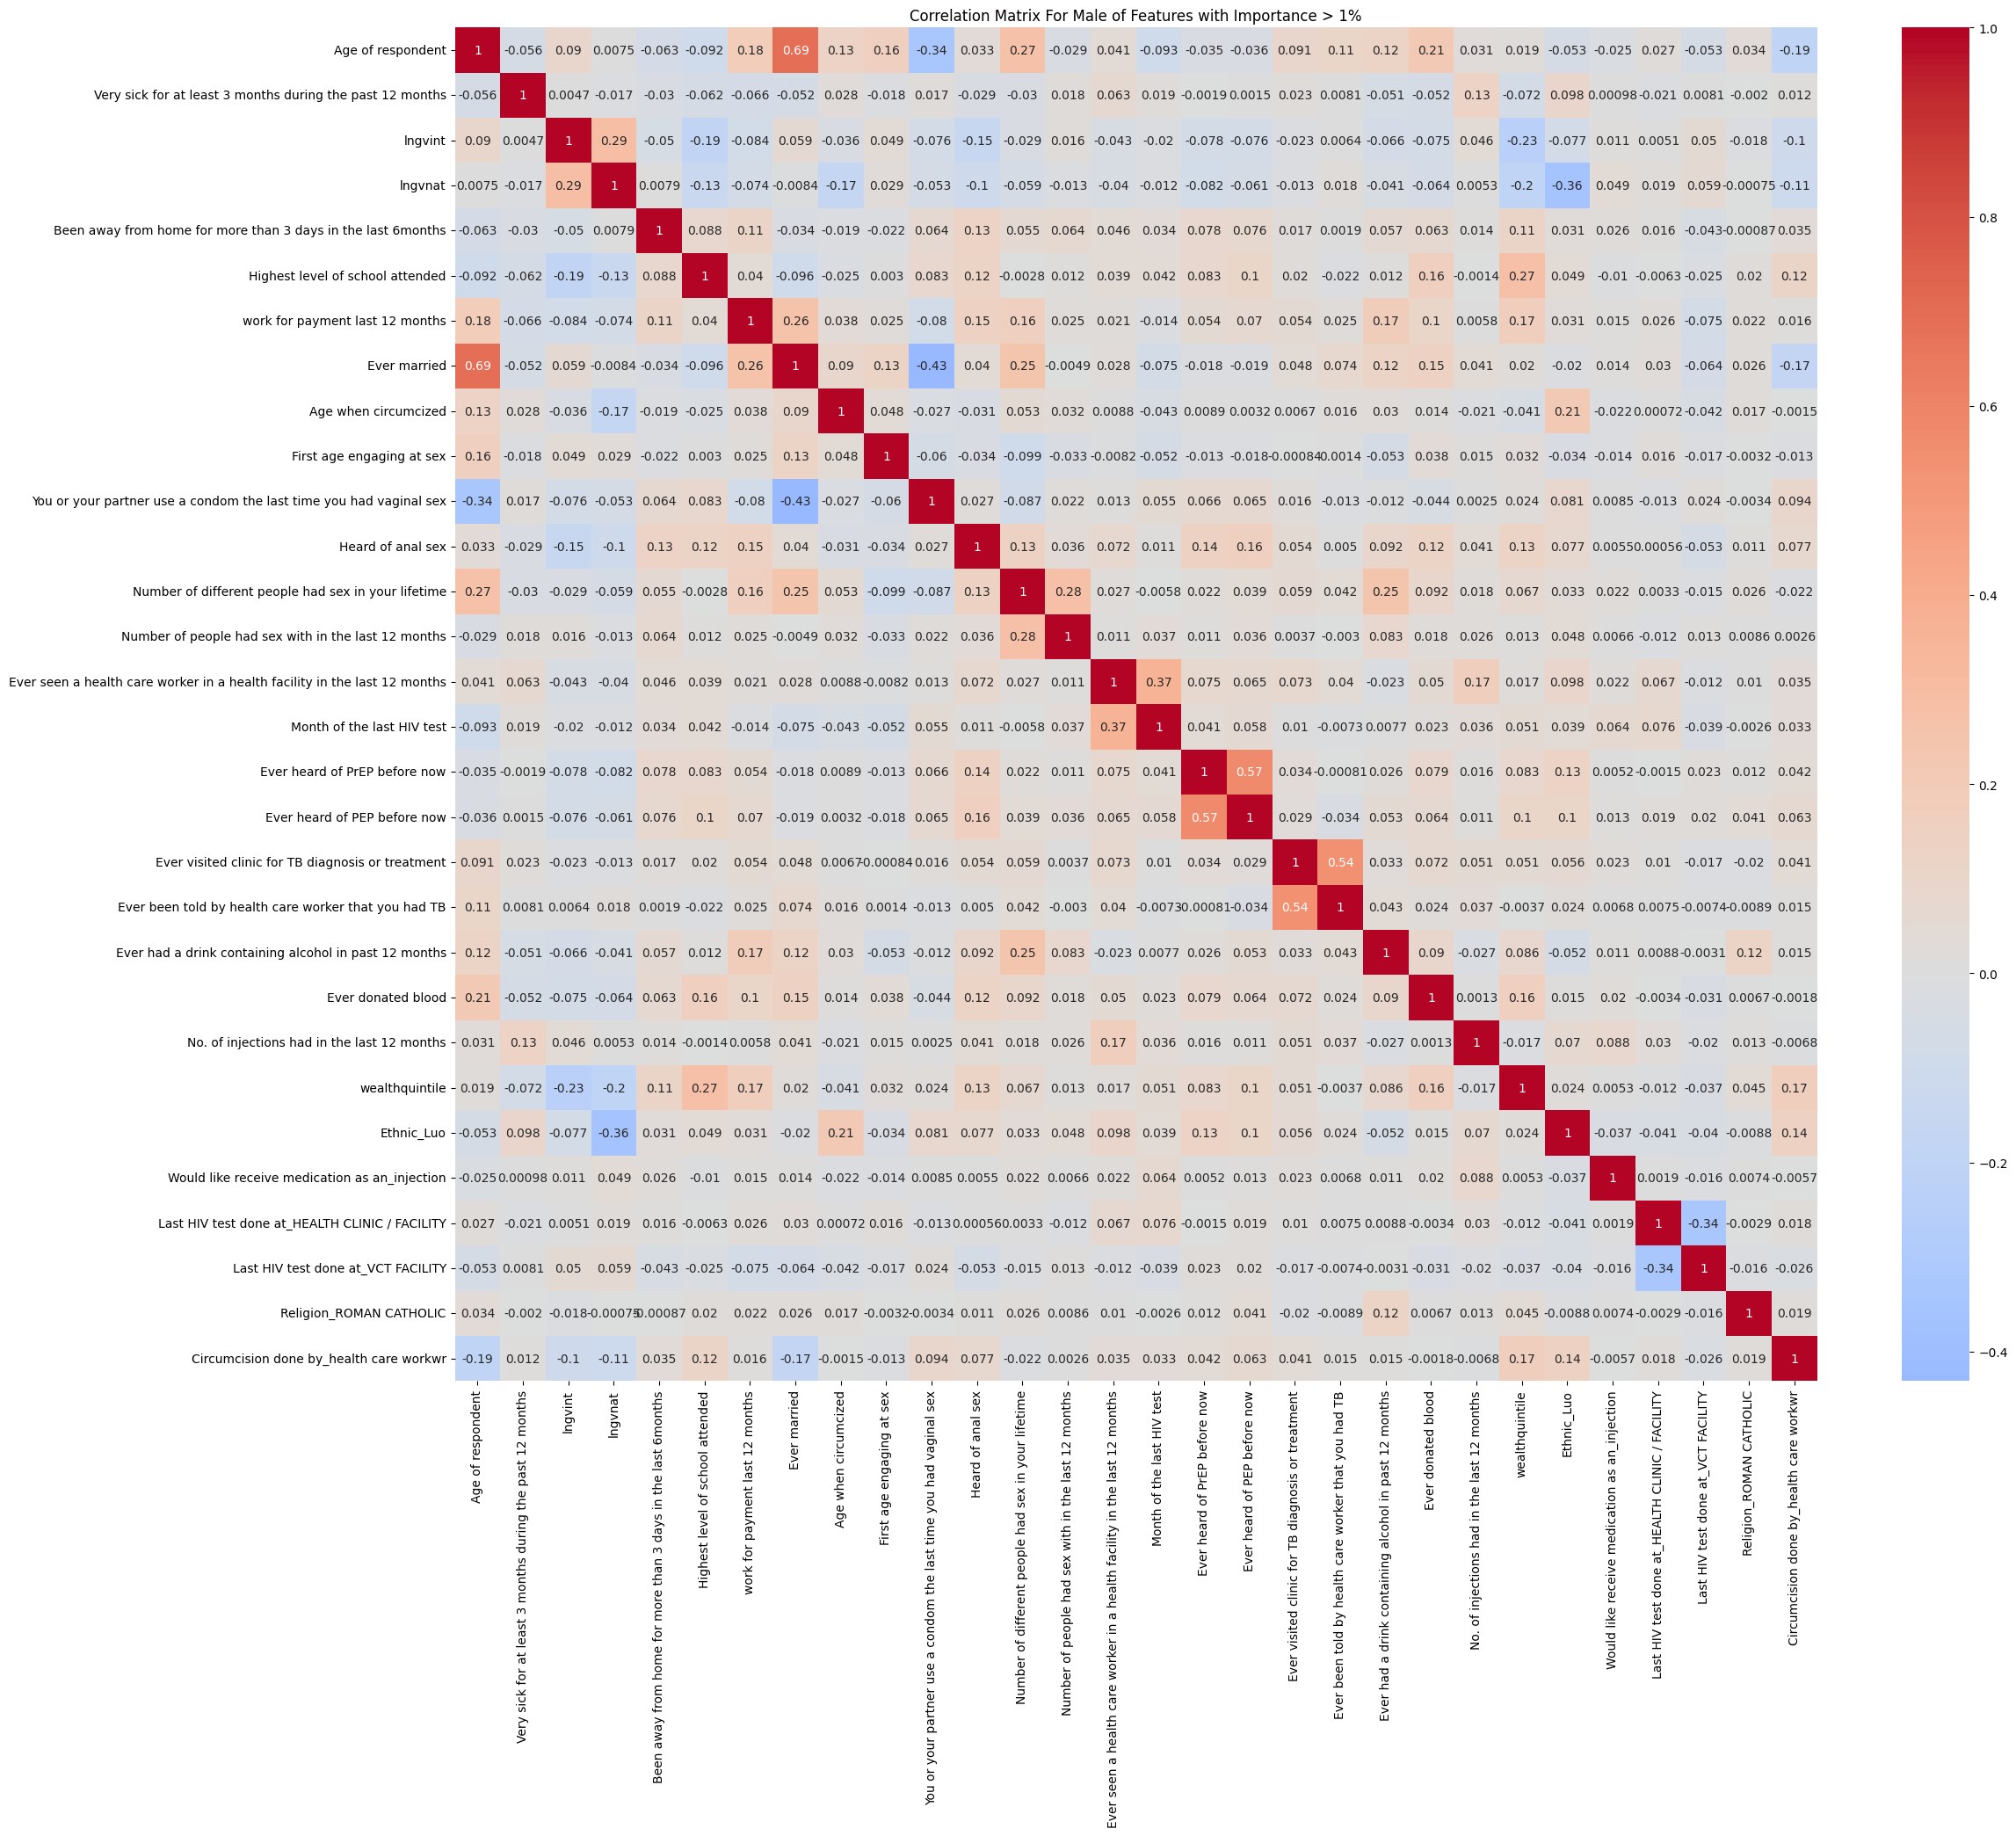

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X=MR_X_clean_all
y=MR_Y_all
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train a RandomForestClassifier
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Filter features with importance > 1%
filtered_features = feature_importances[feature_importances['Importance'] > 0.01]['Feature']

# Compute the correlation matrix for the filtered features
filtered_df = MR_X_clean_all[filtered_features]
corr_matrix = filtered_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix For Male of Features with Importance > 1%')
plt.show()

### Correlation Matrix For female of Features with Importance > 1%

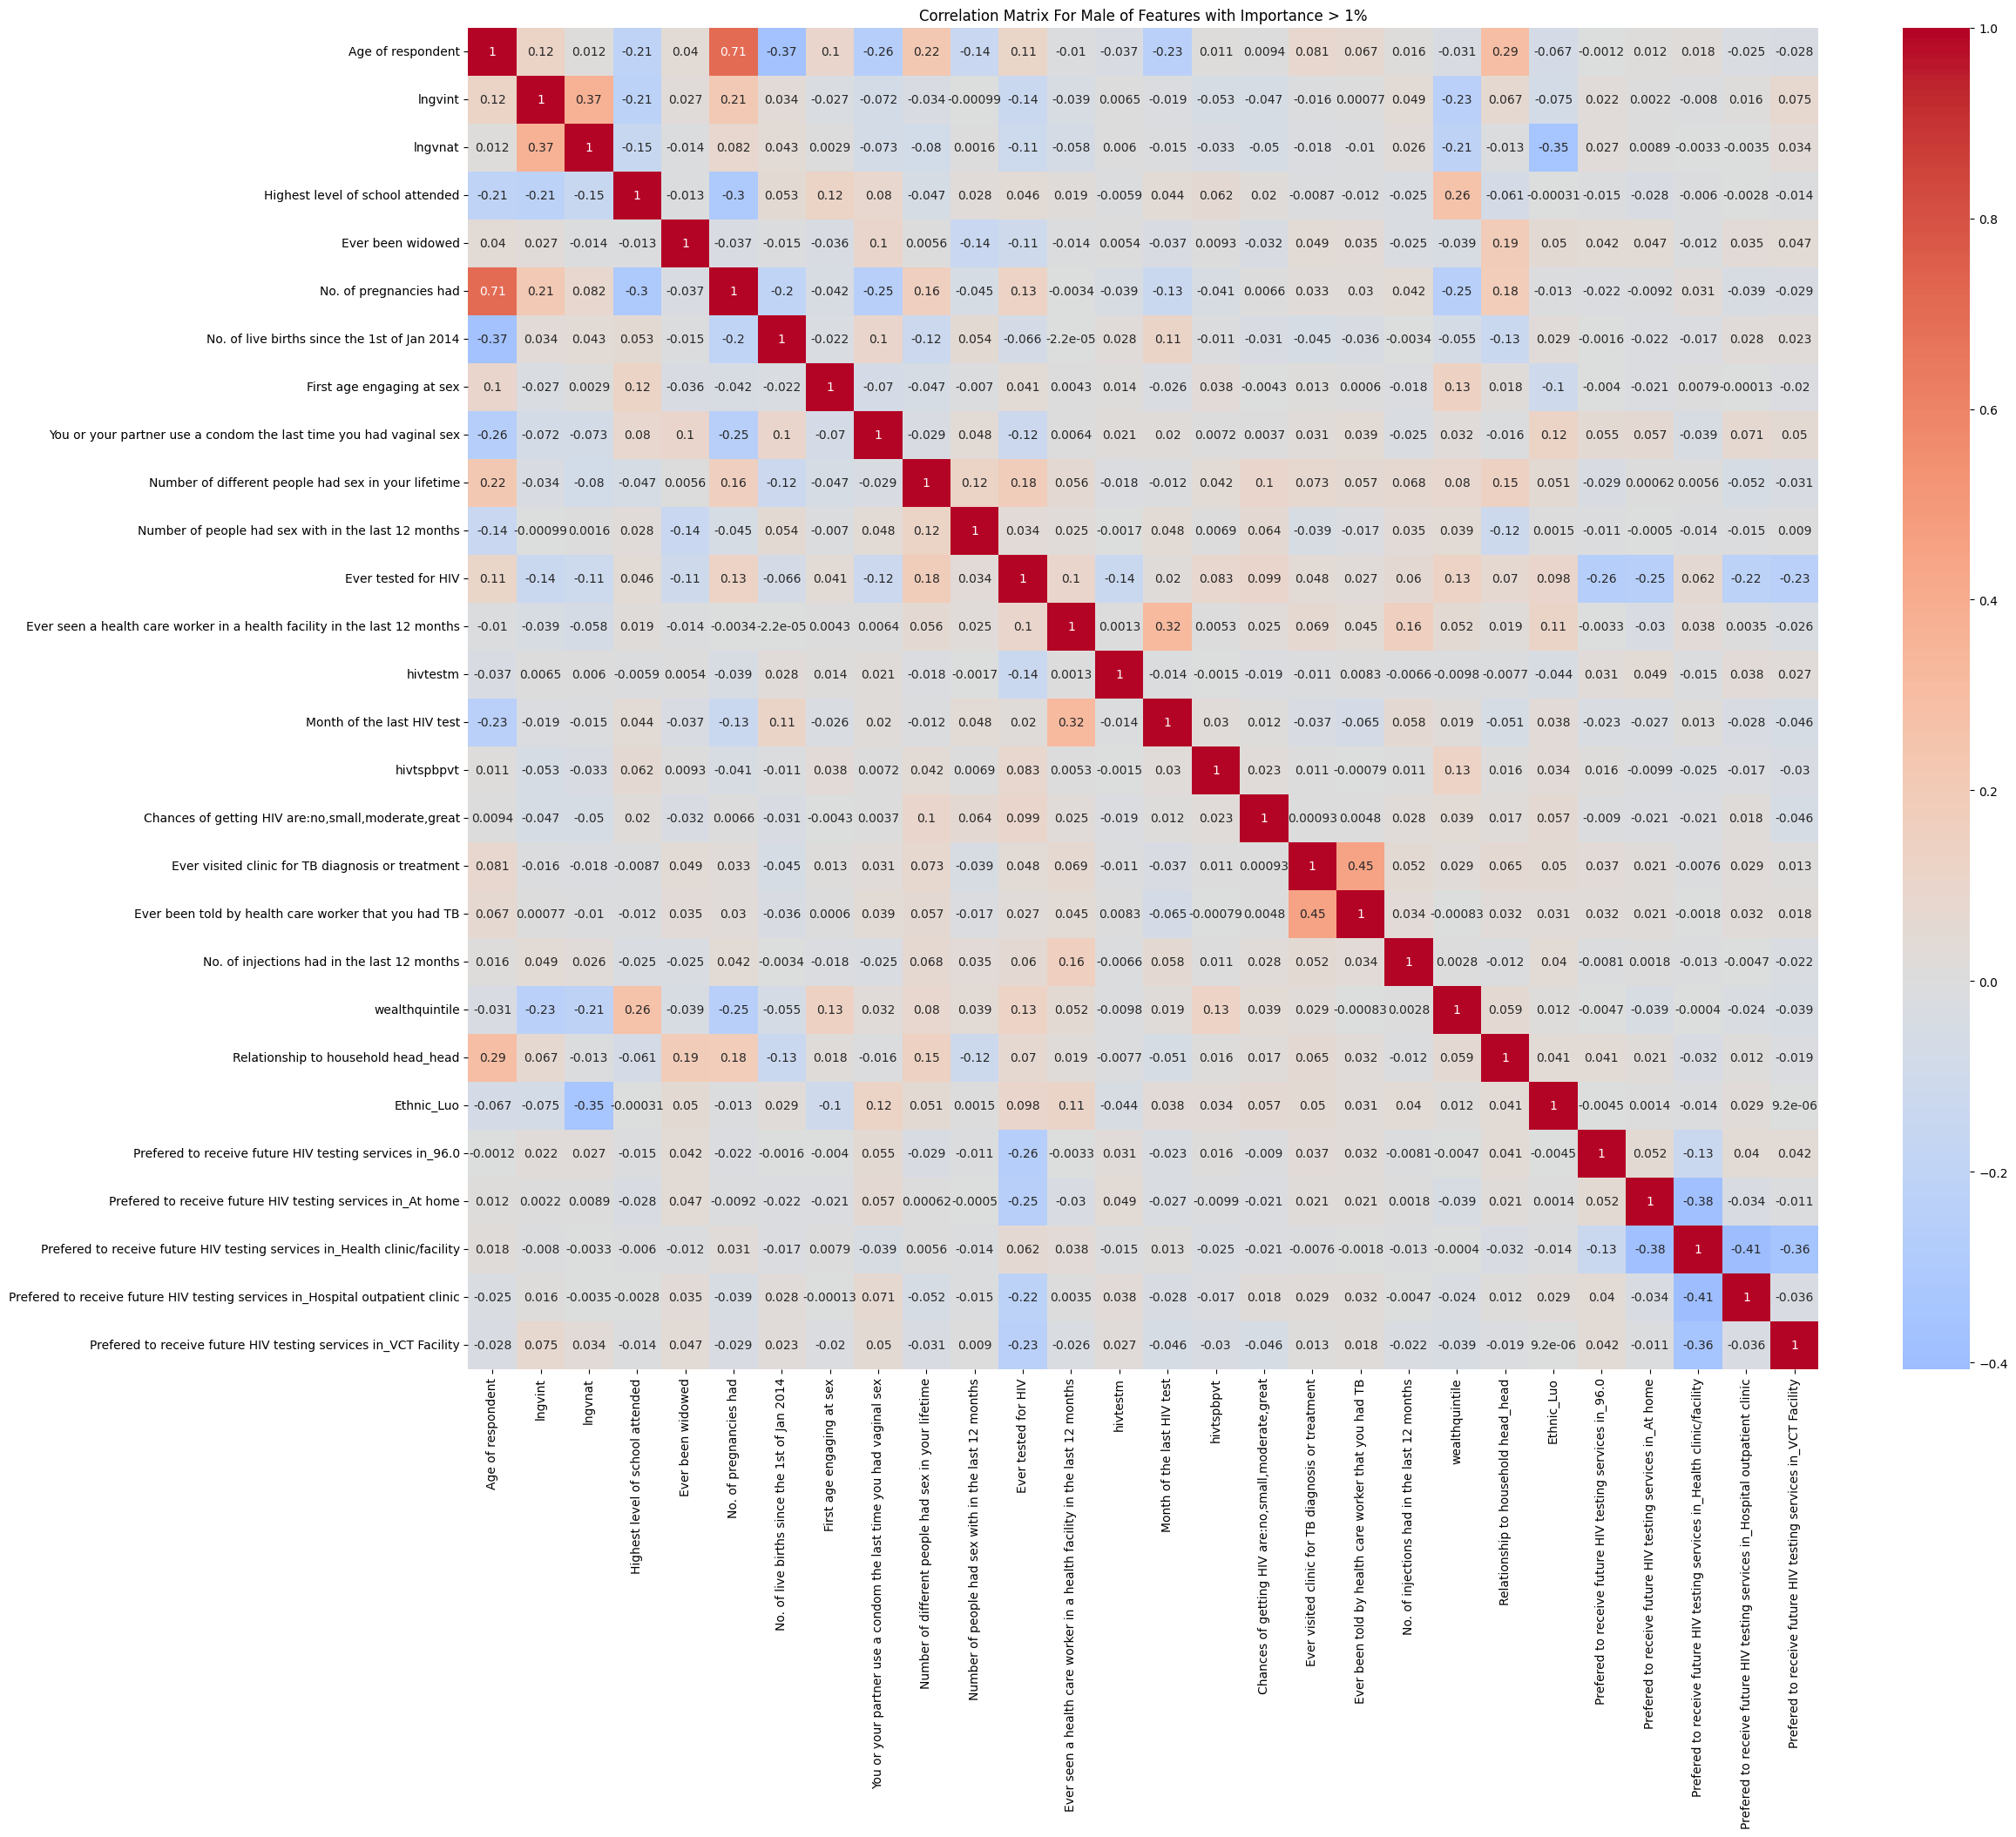

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X=IR_X_clean_all
y=IR_Y_all
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train a RandomForestClassifier
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Filter features with importance > 1%
filtered_features = feature_importances[feature_importances['Importance'] > 0.01]['Feature']

# Compute the correlation matrix for the filtered features
filtered_df = IR_X_clean_all[filtered_features]
corr_matrix = filtered_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix For Male of Features with Importance > 1%')
plt.show()

According to the correlation matrix for both men and women, a person's age is strongly correlated with a number of socio-behavioral traits that can predict their HIV status or persuade them to get tested because of the high likelihood of finding out. The location of the person greatly impacted on the since ethnic luo and Kisumu were among the important features during the prediction.

### Male HIV status prediction

In [39]:
#specify the predictors(X) and the target variable(y)
X=MR_X_clean_all
y=MR_Y_all

In [40]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, LSTM

In [41]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Feature Importance For Male Data

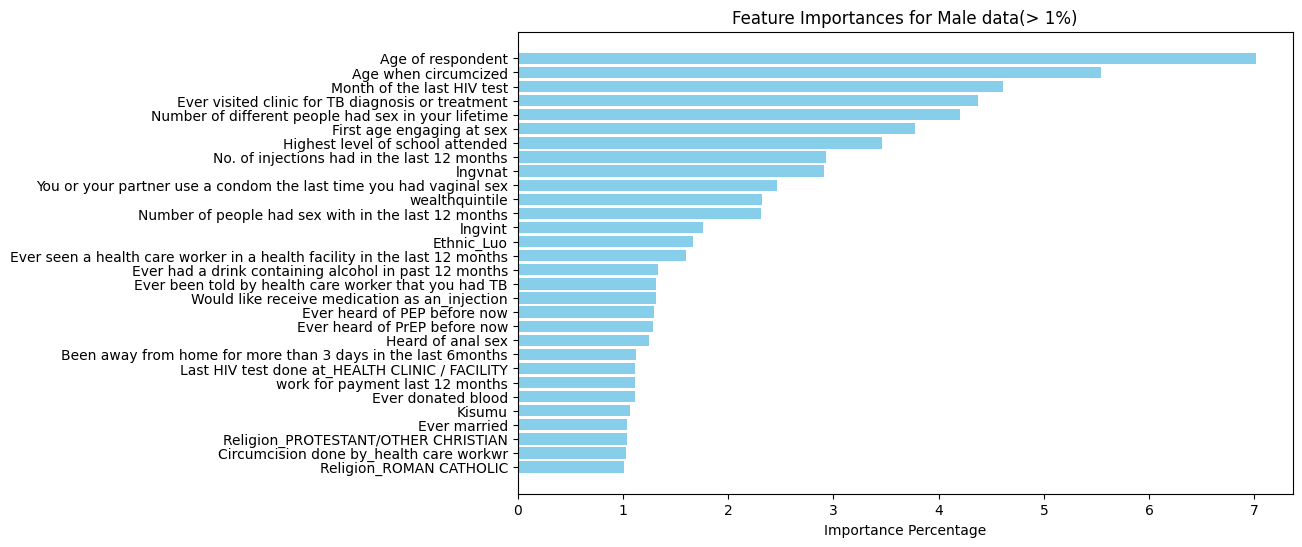

In [42]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier  # Use RandomForestRegressor for regression tasks

# Initialize the model - RandomForestClassifier for classification tasks
# For regression use RandomForestRegressor
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances from the model
importances = model.feature_importances_

# Create a DataFrame for better visualization and handling
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Calculate the percentage of importance
total_importance = feature_importances['Importance'].sum()
feature_importances['Importance_Percentage'] = 100 * feature_importances['Importance'] / total_importance

# Filter features with more than 1% importance
filtered_feature_importances = feature_importances[feature_importances['Importance_Percentage'] > 1]

# Sort the features by importance percentage
filtered_feature_importances = filtered_feature_importances.sort_values(by='Importance_Percentage', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(filtered_feature_importances['Feature'], filtered_feature_importances['Importance_Percentage'], color='skyblue')
plt.xlabel('Importance Percentage')
plt.title('Feature Importances for Male data(> 1%)')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest importance at the top
plt.show()


The feature importance showed the value of the predictors and its importance in terms of percentages for the male data. The visualization of the feature importance were limited to greater than 1 % percent since the predictors were many, 120 feature to be precise, therefore visualizing the optimum few, leaving those with smaller percentage. The age of the respondent Was the most valuable predictor in determining the HIV status in male gender then followed by the age when circumcised

### RNN model(male)

In [43]:

# Build the RNN model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(units=50),
    Dense(units=1, activation='sigmoid')
])

In [44]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [45]:
# Train the model
history1 = model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), 
                    y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_split=0.1, 
                    callbacks=[early_stopping])


Epoch 1/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 49s 120ms/step - accuracy: 0.9610 - loss: 0.2064 - val_accuracy: 0.9649 - val_loss: 0.1500
Epoch 2/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 42s 121ms/step - accuracy: 0.9704 - loss: 0.1344 - val_accuracy: 0.9649 - val_loss: 0.1499
Epoch 3/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 40s 116ms/step - accuracy: 0.9699 - loss: 0.1365 - val_accuracy: 0.9649 - val_loss: 0.1501
Epoch 4/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 42s 121ms/step - accuracy: 0.9707 - loss: 0.1325 - val_accuracy: 0.9649 - val_loss: 0.1499
Epoch 5/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 41s 118ms/step - accuracy: 0.9669 - loss: 0.1453 - val_accuracy: 0.9649 - val_loss: 0.1499
Epoch 6/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 40s 114ms/step - accuracy: 0.9690 - loss: 0.1386 - val_accuracy: 0.9649 - val_loss: 0.1507
Epoch 7/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 40s 115ms/step - accuracy: 0.9700 - loss: 0.1350 - val_accuracy: 0.9649 - val_loss: 0.1501
Epoch 8/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 40s 116ms/step - accuracy: 0.9677 - loss: 0

In [46]:
# Save the trained model
model.save(r'C:\Users\user\OneDrive\Desktop\ML work\ML_models\male_rnn.keras')

In [47]:
# Evaluate the model on training data
train_loss, train_accuracy = model.evaluate(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, verbose=0)

# Evaluate the model on testing data
test_loss, test_accuracy = model.evaluate(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test, verbose=0)

print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)
print("Testing Loss:", test_loss)
print("Testing Accuracy:", test_accuracy)

Training Loss: 0.13676424324512482
Training Accuracy: 0.9694344401359558
Testing Loss: 0.13894832134246826
Testing Accuracy: 0.9689440727233887


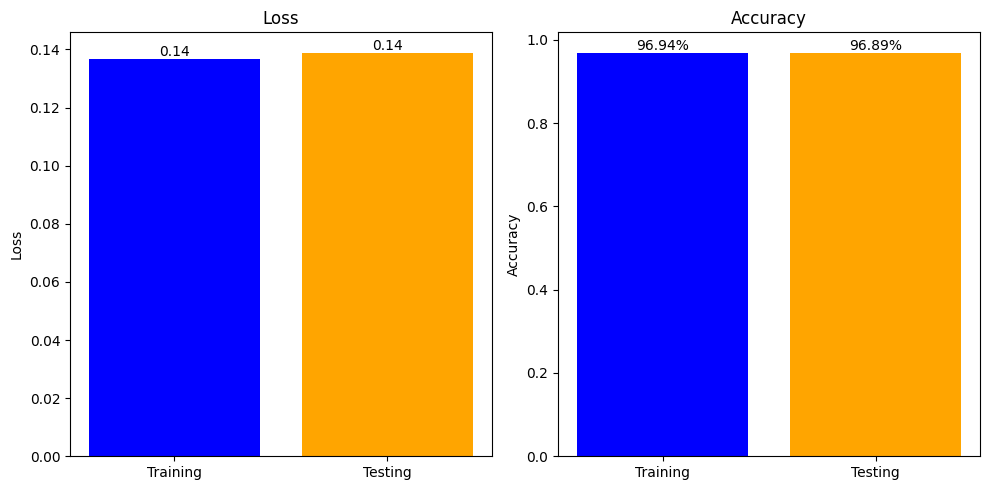

In [48]:
import matplotlib.pyplot as plt

# Define data
loss_data = [train_loss, test_loss]
accuracy_data = [train_accuracy, test_accuracy]
labels = ['Training', 'Testing']

# Plotting
plt.figure(figsize=(10, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.bar(labels, loss_data, color=['blue', 'orange'])
plt.title('Loss')
plt.ylabel('Loss')
for i in range(len(labels)):
    plt.text(i, loss_data[i], str(round(loss_data[i], 2)), ha='center', va='bottom')

# Accuracy plot
plt.subplot(1, 2, 2)
plt.bar(labels, accuracy_data, color=['blue', 'orange'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
for i in range(len(labels)):
    plt.text(i, accuracy_data[i], str(round(accuracy_data[i]*100, 2))+'%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


##### Hyperparameters used(RNN):
- LSTM units: 50
- Optimizer: Adam
- Loss function: Binary crossentropy
- Batch size: 32
- Patience for early stopping: 5 epochs

### ANN model(Male)

In [49]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [50]:
# Creating the model
model = Sequential()
model.add(Dense(units=64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Setting early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [51]:
# Training the model
history2 = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=100, 
                    batch_size=32, 
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9357 - loss: 1.5770 - val_accuracy: 0.8235 - val_loss: 0.3960
Epoch 2/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9528 - loss: 0.3229 - val_accuracy: 0.9289 - val_loss: 0.2062
Epoch 3/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9582 - loss: 0.3414 - val_accuracy: 0.9694 - val_loss: 0.1963
Epoch 4/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9600 - loss: 0.2595 - val_accuracy: 0.9694 - val_loss: 0.4048
Epoch 5/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9608 - loss: 0.2657 - val_accuracy: 0.9694 - val_loss: 0.2380
Epoch 6/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9554 - loss: 0.2910 - val_accuracy: 0.9391 - val_loss: 0.1867
Epoch 7/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9646 - loss: 0.2090 - val_accuracy: 0.9530 - val_loss: 0.1577
Epoch 8/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9656 - loss: 0.1505 - val_accu

In [52]:
# Save the trained model
model.save(r'C:\Users\user\OneDrive\Desktop\ML work\ML_models\male_ann.keras')

In [53]:
# Evaluating the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9731 - loss: 0.1029
Test Loss: 0.1073804721236229
Test Accuracy: 0.9692710041999817


In [54]:
# Evaluating the model on training data
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f'Training Accuracy: {train_accuracy:.4f}')

# Evaluating the model on testing data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Testing Accuracy: {test_accuracy:.4f}')

Training Accuracy: 0.9725
Testing Accuracy: 0.9693


Training Accuracy: 0.9725
Testing Accuracy: 0.9693


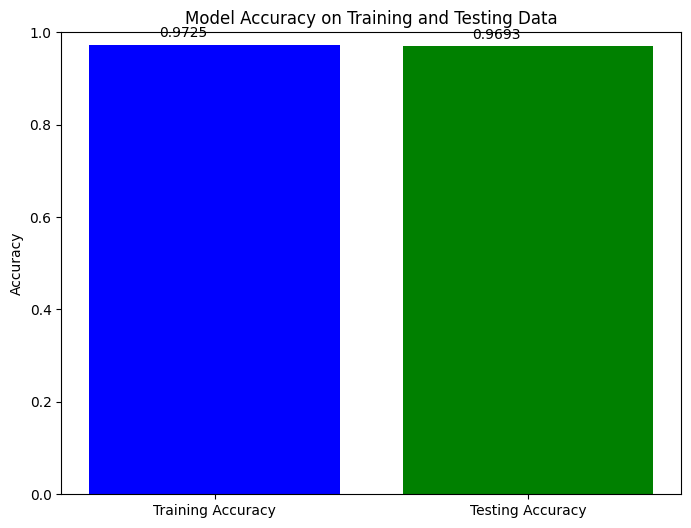

In [55]:
import matplotlib.pyplot as plt

# Evaluating the model on training data
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f'Training Accuracy: {train_accuracy:.4f}')

# Evaluating the model on testing data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Testing Accuracy: {test_accuracy:.4f}')

# Data for plotting
labels = ['Training Accuracy', 'Testing Accuracy']
accuracies = [train_accuracy, test_accuracy]

# Creating the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, accuracies, color=['blue', 'green'])

# Adding the accuracy values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom')

# Setting the title and labels
plt.title('Model Accuracy on Training and Testing Data')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1

# Display the plot
plt.show()


#### Hyperparameters used:
- Number of epochs: 100
- Batch size: 32
- Optimizer: Adam
- Loss function: binary_crossentropy
- Early stopping patience: 10

## Female HIV status prediction

In [56]:
X=IR_X_clean_all
y=IR_Y_all

In [57]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Feature Importance for the Female Data

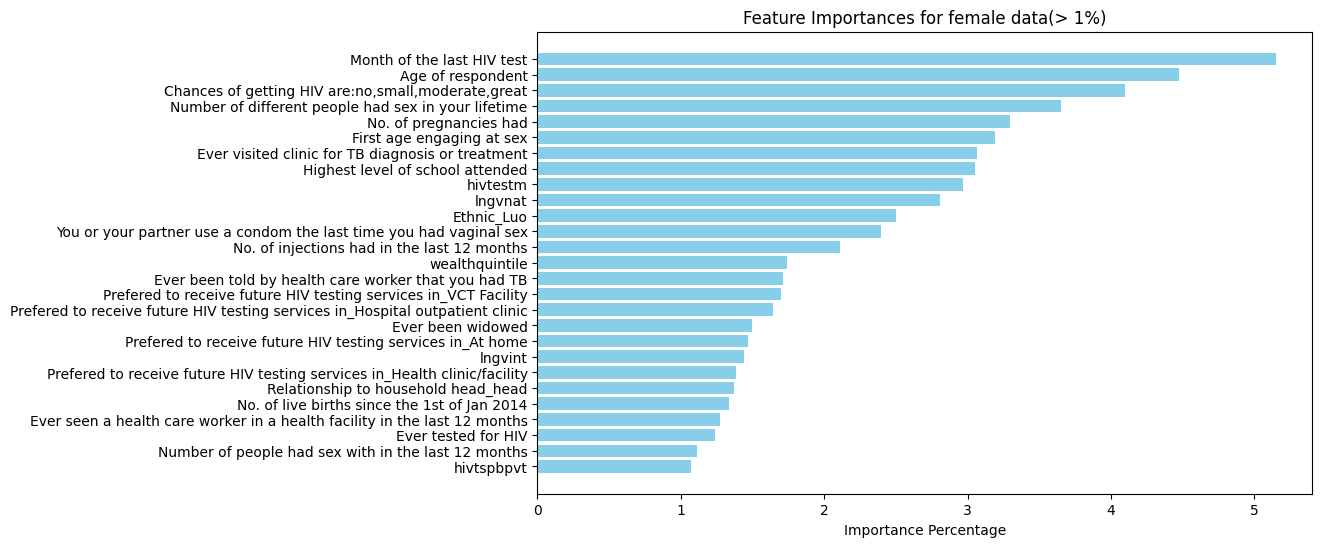

In [58]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier  # Use RandomForestRegressor for regression tasks

# Initialize the model - RandomForestClassifier for classification tasks
# For regression use RandomForestRegressor
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances from the model
importances = model.feature_importances_

# Create a DataFrame for better visualization and handling
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Calculate the percentage of importance
total_importance = feature_importances['Importance'].sum()
feature_importances['Importance_Percentage'] = 100 * feature_importances['Importance'] / total_importance

# Filter features with more than 1% importance
filtered_feature_importances = feature_importances[feature_importances['Importance_Percentage'] > 1]

# Sort the features by importance percentage
filtered_feature_importances = filtered_feature_importances.sort_values(by='Importance_Percentage', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(filtered_feature_importances['Feature'], filtered_feature_importances['Importance_Percentage'], color='skyblue')
plt.xlabel('Importance Percentage')
plt.title('Feature Importances for female data(> 1%)')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest importance at the top
plt.show()


For the women data, the most valuable predictor variable with the highest score is "the month of the last HIV test" variable. The visualization of the feature importance were limited to greater than 1 % percent since the predictors were many, 138 features to be precise, therefore visualizing the optimum few, leaving those with smaller percentages. The number of the features for the female were many compared to male which lead to there splitting and training the models separately. 

### RNN model(Female)

In [59]:
# Build the RNN model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(units=50),
    Dense(units=1, activation='sigmoid')
])

In [60]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [61]:
# Train the model
history3 = model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), 
                    y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_split=0.1, 
                    callbacks=[early_stopping])


Epoch 1/50
355/355 ━━━━━━━━━━━━━━━━━━━━ 61s 145ms/step - accuracy: 0.9143 - loss: 0.3149 - val_accuracy: 0.9349 - val_loss: 0.2405
Epoch 2/50
355/355 ━━━━━━━━━━━━━━━━━━━━ 2159s 6s/step - accuracy: 0.9335 - loss: 0.2447 - val_accuracy: 0.9349 - val_loss: 0.2380
Epoch 3/50
355/355 ━━━━━━━━━━━━━━━━━━━━ 54s 152ms/step - accuracy: 0.9365 - loss: 0.2355 - val_accuracy: 0.9349 - val_loss: 0.2374
Epoch 4/50
355/355 ━━━━━━━━━━━━━━━━━━━━ 52s 145ms/step - accuracy: 0.9318 - loss: 0.2476 - val_accuracy: 0.9349 - val_loss: 0.2401
Epoch 5/50
355/355 ━━━━━━━━━━━━━━━━━━━━ 48s 136ms/step - accuracy: 0.9378 - loss: 0.2326 - val_accuracy: 0.9349 - val_loss: 0.2376
Epoch 6/50
355/355 ━━━━━━━━━━━━━━━━━━━━ 51s 143ms/step - accuracy: 0.9341 - loss: 0.2404 - val_accuracy: 0.9349 - val_loss: 0.2374
Epoch 7/50
355/355 ━━━━━━━━━━━━━━━━━━━━ 60s 169ms/step - accuracy: 0.9320 - loss: 0.2464 - val_accuracy: 0.9349 - val_loss: 0.2367
Epoch 8/50
355/355 ━━━━━━━━━━━━━━━━━━━━ 48s 135ms/step - accuracy: 0.9320 - loss: 0.

In [62]:
# Save the trained model
model.save(r'C:\Users\user\OneDrive\Desktop\ML work\ML_models\female_rnn.keras')

Training Accuracy: 0.9353, Training Loss: 0.2371
Testing Accuracy: 0.9355, Testing Loss: 0.2408


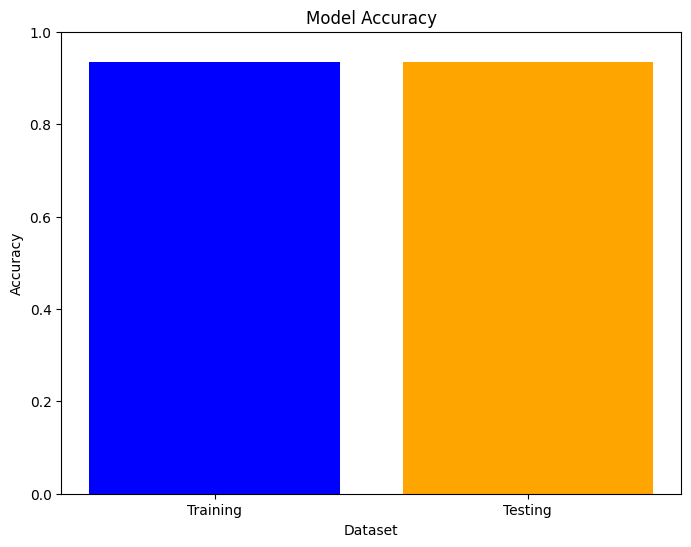

In [63]:
import matplotlib.pyplot as plt

# Evaluate the model on the training data
train_score = model.evaluate(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, verbose=0)
print(f'Training Accuracy: {train_score[1]:.4f}, Training Loss: {train_score[0]:.4f}')

# Evaluate the model on the testing data
test_score = model.evaluate(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test, verbose=0)
print(f'Testing Accuracy: {test_score[1]:.4f}, Testing Loss: {test_score[0]:.4f}')

# Visualizing the scores using bar plots
scores = {'Training': train_score[1], 'Testing': test_score[1]}
plt.figure(figsize=(8, 6))
plt.bar(scores.keys(), scores.values(), color=['blue', 'orange'])
plt.ylim(0, 1)
plt.title('Model Accuracy')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.show()


##### Hyperparameters used(RNN):
- LSTM units: 50
- Optimizer: Adam
- Loss function: Binary crossentropy
- Batch size: 32
- Patience for early stopping: 5 epochs

### ANN Model(Female)

In [64]:
# Define the model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [65]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history4 = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

Epoch 1/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9233 - loss: 0.2410 - val_accuracy: 0.9595 - val_loss: 0.1365
Epoch 2/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9572 - loss: 0.1302 - val_accuracy: 0.9627 - val_loss: 0.1233
Epoch 3/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9735 - loss: 0.0859 - val_accuracy: 0.9682 - val_loss: 0.1180
Epoch 4/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9785 - loss: 0.0698 - val_accuracy: 0.9694 - val_loss: 0.1116
Epoch 5/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9821 - loss: 0.0563 - val_accuracy: 0.9718 - val_loss: 0.1195
Epoch 6/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9857 - loss: 0.0407 - val_accuracy: 0.9714 - val_loss: 0.1173
Epoch 7/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9906 - loss: 0.0299 - val_accuracy: 0.9702 - val_loss: 0.1241
Epoch 8/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9943 - loss: 0.0204 - val_accu

In [66]:
# Save the trained model
model.save(r'C:\Users\user\OneDrive\Desktop\ML work\ML_models\female_ann.keras')

In [67]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9671 - loss: 0.1035
Test Accuracy: 0.96


In [68]:
# Calculate train score
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f'Train Accuracy: {train_accuracy:.2f}')

# Calculate test score (already evaluated in the original code)
print(f'Test Accuracy: {test_accuracy:.2f}')

394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9845 - loss: 0.0512
Train Accuracy: 0.98
Test Accuracy: 0.96


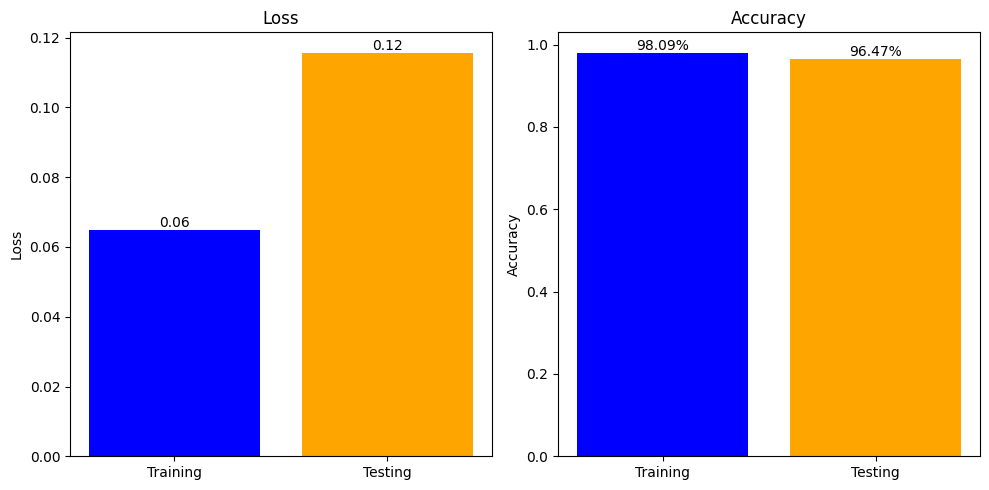

In [69]:
import matplotlib.pyplot as plt

# Define data
loss_data = [train_loss, test_loss]
accuracy_data = [train_accuracy, test_accuracy]
labels = ['Training', 'Testing']

# Plotting
plt.figure(figsize=(10, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.bar(labels, loss_data, color=['blue', 'orange'])
plt.title('Loss')
plt.ylabel('Loss')
for i in range(len(labels)):
    plt.text(i, loss_data[i], str(round(loss_data[i], 2)), ha='center', va='bottom')

# Accuracy plot
plt.subplot(1, 2, 2)
plt.bar(labels, accuracy_data, color=['blue', 'orange'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
for i in range(len(labels)):
    plt.text(i, accuracy_data[i], str(round(accuracy_data[i]*100, 2))+'%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### Hyperparameters used:
- Number of epochs: 100
- Batch size: 32
- Optimizer: Adam
- Loss function: binary_crossentropy
- Early stopping patience: 10

### Evaluation of The Models

In [70]:
### Evaluation
import pandas as pd

# Data
data = {
    'Algorithm': ['RNN', 'ANN', 'RNN', 'ANN'],
    'Gender': ['Male', 'Male', 'Female', 'Female'],
    'Training Accuracy (%)': [96.94, 97.25, 93.53, 98.00],
    'Testing Accuracy (%)': [96.89, 96.93, 93.55, 96.00]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the table
print(df)

  Algorithm  Gender  Training Accuracy (%)  Testing Accuracy (%)
0       RNN    Male                  96.94                 96.89
1       ANN    Male                  97.25                 96.93
2       RNN  Female                  93.53                 93.55
3       ANN  Female                  98.00                 96.00


### Summary

Out of the two deep learning algorithms, RNN and ANN, the ANN algorithm emerged as the best in both males and females. After the exploratory data analysis, findings provide a potential use of the ANN algorithm with socio-behavioral-driven data to substantially identify HIV predictors and predict individuals at high risk of infection for targeted screening. For the Male dataset, ANN was the best to use in predicting the HIV status with a training score of 97.34% and a testing score of 97.09%. For the female data, the ANN algorithm still emerged the best with a training score of 98% and a testing score of 96% 